In [1]:
import networkx as nx
import py_scripts_yann
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

from pylab import *
from matplotlib2tikz import save as tikz_save

import run_RF_net

import json

import launch_RF_net_multiproc

RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/199/RF_net_N_250_target_p5_Wmax_2_alpha_normal_20_10_homogbase_5_scaling_p5_eta_2_OU_2p5_sweep_density_pc_measure_struct_5sims_W_density0.2ext_OU_sigma4.0',5,False)

json_data=open('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/199/config.json').read()
RF_sim_pars = json.loads(json_data)['sim_pars']

RF_sim_pars['OU_global'] = 0.0
net_i = RF_results[0]['networks'][0]
net_i.W_conn = np.ones((100,100))
simresults_static = run_RF_net.run_RF_net(net_i,RF_sim_pars,'corr',10000,1,True)
selectivities_results_static = run_RF_net.analyse_RF_net_run_ori_group(simresults_static,net_i)

Upgrade to   matplotlib2tikz 0.7.6    available! (installed: 0.6.11)

matplotlib2tikz's API changes in this upgrade. Changes to your code may be necessary.

To upgrade matplotlib2tikz with pip, type

   pip install -U matplotlib2tikz

To upgrade _all_ pip-installed packages, use

   pipdate/pipdate3

To disable these checks, set SecondsBetweenChecks in /mnt/DATA/ysweeney/.config/pipdated/config.ini to -1.


/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/NeuroTools/analysis.py:34: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-

KeyError: 'heterogenous_r_0'

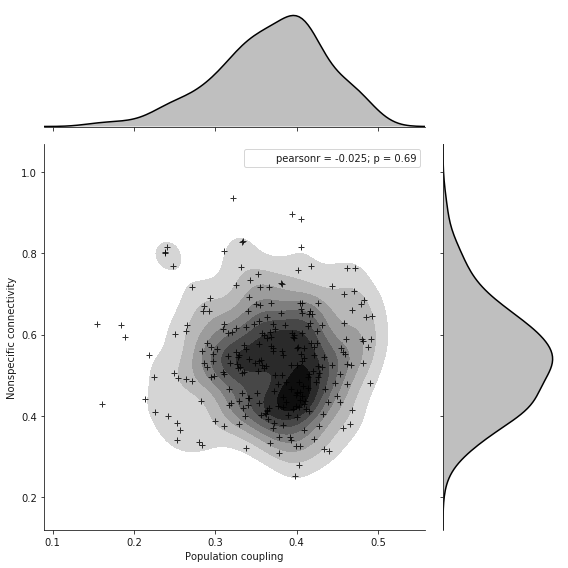

In [3]:
%matplotlib inline
save_fig=False

sns.set_color_codes("pastel")

g = sns.jointplot((selectivities_results_static['empirical_pop_coupling']),np.sum(net_i.W,axis=1),size=8,ratio=3,color='black',kind='kde')#,xlim=(-3.0,2.5))
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+",alpha=0.8)
#sns.kdeplot(scipy.stats.zscore(RF_result['selectivities_results_corr'][0]['empirical_pop_coupling']),RF_result['networks'][0].pop_coupling,n_levels=10, ax=g.ax_joint);
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(xlabel='Population coupling', ylabel='Nonspecific connectivity')

#g.ax_marg_y.set_visible(False)

plt.tight_layout()
if save_fig:
    tikz_save('manuscript/figures/uncorr_link.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/static_link.pdf')

sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4
sim idx  0
sim idx  1
sim idx  2
sim idx  3
sim idx  4


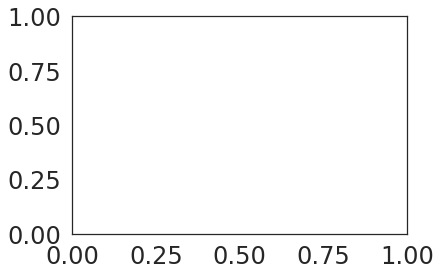

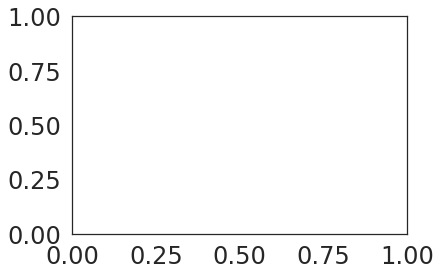

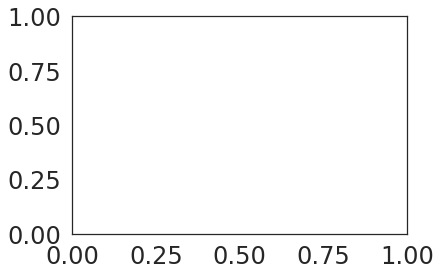

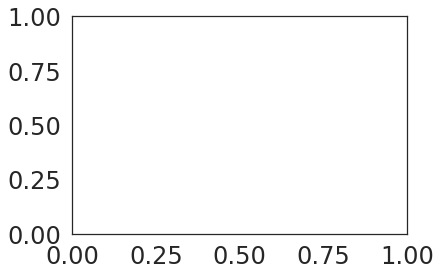

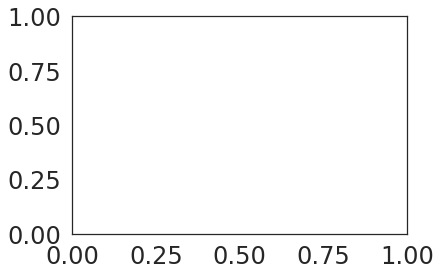

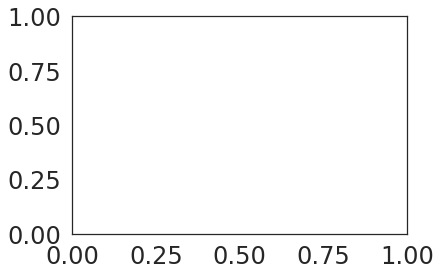

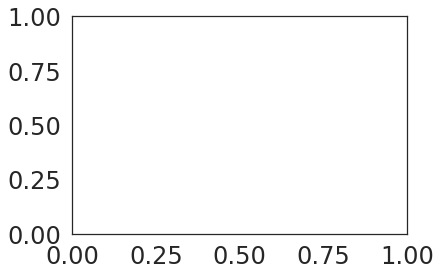

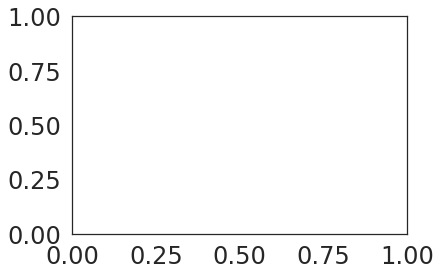

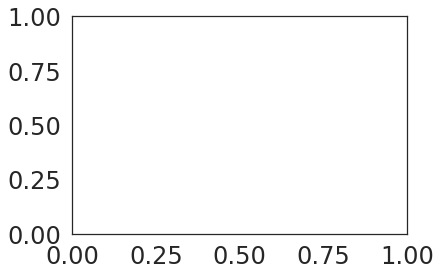

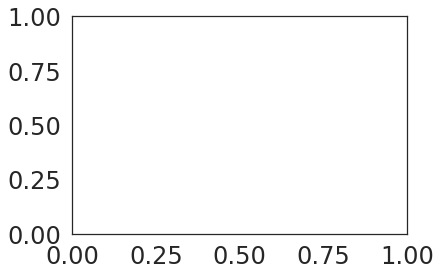

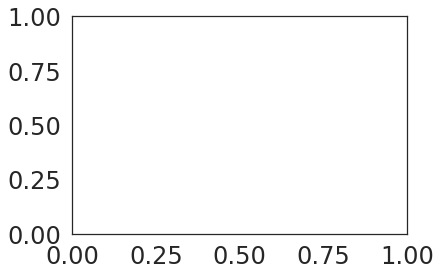

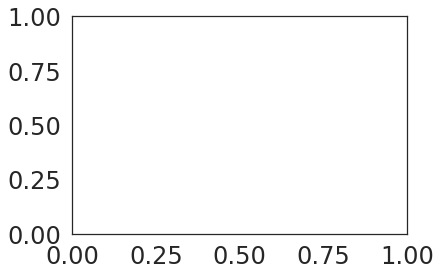

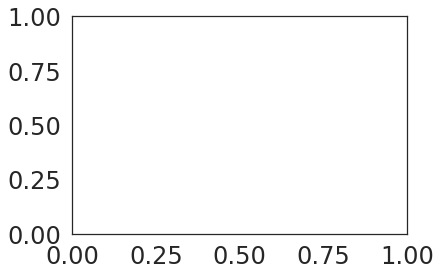

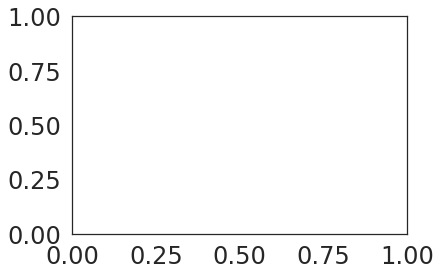

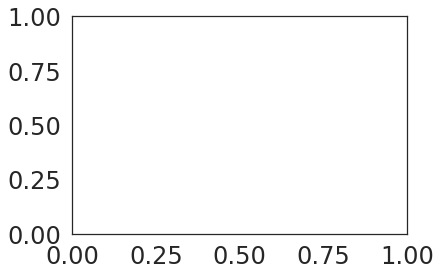

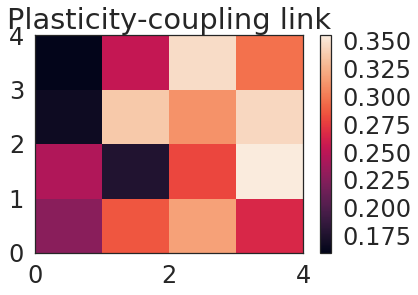

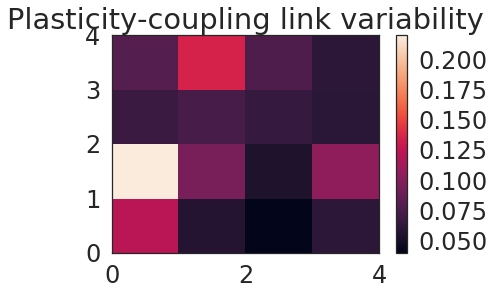

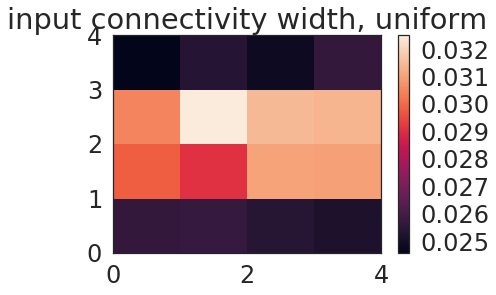

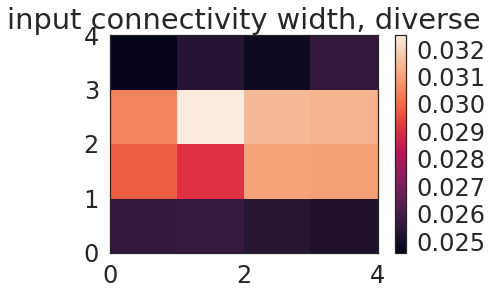

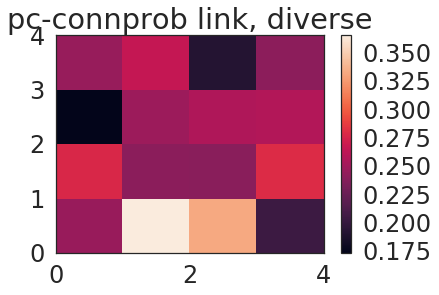

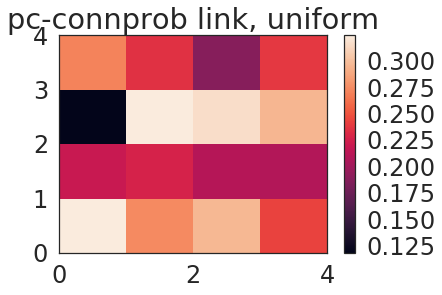

In [158]:
import launch_RF_net_multiproc
reload(launch_RF_net_multiproc)
    
sweep_results = launch_RF_net_multiproc.consolidate_sweep_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/203/')
#sweep_results = launch_RF_net_multiproc.consolidate_sweep_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/194/

In [5]:
save_fig=False

import run_single_neuron_associative_learning

json_data=open('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/203/config.json').read()
RF_sim_pars = json.loads(json_data)['sim_pars']
print RF_sim_pars['par_sweep_vals']

sns.set(style="white",context='poster',font_scale=1.5)
f, ax = plt.subplots(1,2,figsize=(14, 6))
#ax_pc = ax.twinx()

#sns.set_palette('Set1',4)
sns.set_color_codes("deep")

ax[0].plot(sweep_results['diverse_selectivity_upper'][0,:],color=sns.color_palette()[0],label='diverse learning rates')
ax[0].plot(sweep_results['uniform_selectivity_upper'][0,:],color=sns.color_palette()[1],label='uniform learning rate')
#ax_pc.plot(sweep_results['diverse_pc_std'][0,:],'--',color=sns.color_palette()[0])
#ax_pc.plot(sweep_results['uniform_pc_std'][0,:],'--',color=sns.color_palette()[1])
ax[1].plot(sweep_results['diverse_pc_std'][0,:],color=sns.color_palette()[0])
ax[1].plot(sweep_results['uniform_pc_std'][0,:],color=sns.color_palette()[1])


ax[1].set_ylabel('Population coupling width',color='black')
#ax_pc.set_ylim(0,0.04)
ax[1].tick_params('y',colors='black')

ax[0].legend(['Diverse '+r'$\alpha$','Uniform '+r'$\alpha$'])
ax[1].legend(['Diverse '+r'$\alpha$','Uniform '+r'$\alpha$'])
#ax[1].legend(['PC width, diverse '+r'$\alpha$','PC width, uniform '+r'$\alpha$'],bbox_to_anchor=(0.0, 0.85, 1, 0.5))
#ax[0].legend(['selectivity, diverse '+r'$\alpha$','selectivity, uniform '+r'$\alpha$'],bbox_to_anchor=(0.0, 1.2, 1, 0.5),)


#ax_pc.set_ylim(0.018,0.042)
#ax.set_xticks(np.arange(0.0,8.0,1.0))
#ax.set_xticklabels(np.arange(1.0,9.0,1.0))
ax[0].set_xlabel('Injected noise ' + r'($\sigma_{OU}$)')
ax[0].set_ylabel('Selectivity')
ax[0].set_xticks(np.arange(0.0,8.0,1.0))
ax[0].set_xticklabels(np.arange(1.0,9.0,1.0))

ax[1].set_xlabel('Injected noise ' + r'($\sigma_{OU}$)')
ax[1].set_ylabel('PC width')
ax[1].set_xticks(np.arange(0.0,8.0,1.0))
ax[1].set_xticklabels(np.arange(1.0,9.0,1.0))


sns.despine(left=False,right=False,bottom=False)
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/selectivity_stdPC_OU_separate.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/selectivity_stdPC_OU_separate.png',dpi=400,bbox_inches='tight')

[0.2, 0.35, 0.5, 0.8]


NameError: name 'sweep_results' is not defined

In [868]:
plt.figure()
plt.pcolor(sweep_results['diverse_selectivity_mean'])
plt.colorbar()

plt.figure()
plt.pcolor(sweep_results['uniform_selectivity_mean'])
plt.colorbar()

plt.figure()
plt.pcolor(sweep_results['diverse_pc_std'])
plt.colorbar()


plt.figure()
plt.pcolor(sweep_results['uniform_pc_std'])
plt.colorbar()


plt.figure()
plt.pcolor(sweep_results['diverse_pc_std']/sweep_results['uniform_pc_std'])
plt.colorbar()

NameError: name 'sweep_results' is not defined

In [322]:
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/214/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_15sims_W_density0.8ext_OU_sigma5.',15,False)
RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/216/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_15sims_alpha_range150.0ext_OU_sigma7.0',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/221/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_5sims_alpha_range175.0ext_OU_sigma6.0',5,Fal)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/224/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_5sims_heterog_OU_ext_sigma_alpha_range150.0ext_OU_sigma9.0',5,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/225/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_10_sims_sweeping_x_corr_alpha_range_150_x_corr_std0.3ext_OU_sigma5.0',5,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/229/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_5_sims_OU_5_W_density_p8',5,False)

In [869]:
from scipy import stats

uniform_connprob = []
corr_connprob = []
corr_pc = []
uniform_pc = []
uniform_W = []
corr_W = []

uniform_selectivity_fluct = []
corr_selectivity_fluct = []
uniform_selectivity = []
corr_selectivity = []


#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/181/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_3_OU_5_pc_measure_struct_10sims',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/116/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.0',10,False)
#    

#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/190/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.5',15,False)
    
for net_idx in xrange(len(RF_results)):
    for sim_idx in xrange(15):
        uniform_connprob.append(np.mean(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'],axis=0))
        uniform_pc.append(RF_results[net_idx]['selectivities_results_uniform'][sim_idx]['empirical_pop_coupling'])
        uniform_selectivity.append(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][-1])
        uniform_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][5:],axis=0))
        uniform_W.append(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'].flatten())
    #if RF_results[net_idx]['selectivities_results_corr'][0]['pop_coupling_partial_rval']>0.3:
        corr_connprob.append(np.mean(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'],axis=0))
        corr_pc.append(RF_results[net_idx]['selectivities_results_corr'][sim_idx]['empirical_pop_coupling'])
        corr_selectivity.append(RF_results[net_idx]['selectivities_t_corr'][sim_idx][-1])
        corr_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_corr'][sim_idx][5:],axis=0))
        corr_W.append(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'].flatten())

        print 'diverse link', stats.pearsonr(corr_pc[-1],corr_connprob[-1])
        print 'uniform link', stats.pearsonr(uniform_pc[-1],uniform_connprob[-1])
        print 'diverse width', np.std(corr_pc[-1])
        print 'uniform width', np.std(uniform_pc[-1])

plt.figure()
plt.hist([corr_connprob,uniform_connprob],10,normed=True);
plt.legend(['diverse','uniform'])

plt.figure()
plt.hist([corr_pc,uniform_pc],10,normed=True);
plt.legend(['diverse','uniform'])
print 'diverse, uniform width ', np.std(corr_pc)/np.std(uniform_pc)
print 'diverse, uniform range ', (np.max(corr_pc)-np.min(corr_pc))/(np.max(uniform_pc)-np.min(uniform_pc))
print 'diverse, uniform quartile ', (np.percentile(corr_pc,75)-np.percentile(corr_pc,25))/(np.percentile(uniform_pc,75)-np.percentile(uniform_pc,25))

sns.jointplot(np.array(corr_connprob).flatten(),np.array(corr_pc).flatten(),xlim=(0.004,0.018))
sns.jointplot(np.array(uniform_connprob).flatten(),np.array(uniform_pc).flatten(),xlim=(0.004,0.018))

sns.jointplot(np.array(corr_pc).flatten(),np.array(corr_selectivity_fluct).flatten())
sns.jointplot(np.array(uniform_pc).flatten(),np.array(uniform_selectivity_fluct).flatten())


#print 'high unif ' ,np.mean(np.array(uniform_pc[uniform_connprob>0.2]))
#print 'low unif ' ,np.mean(np.array(uniform_pc[uniform_connprob<0.2]))
                    
#print 'high diverse ' ,np.mean(np.array(corr_pc[corr_connprob>0.2]))
#print 'low diverse' ,np.mean(np.array(corr_pc[corr_connprob<0.2]))

plt.figure()
digit = np.digitize(np.array(uniform_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(uniform_connprob).flatten()[digit==i]) for i in xrange(40)])
digit = np.digitize(np.array(corr_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(corr_connprob).flatten()[digit==i]) for i in xrange(40)])

plt.legend(['uniform','diverse'])

diverse link (0.38942468705121969, 1.7694160788515348e-10)
uniform link (0.11168416035067735, 0.077976409673095923)
diverse width 0.0420921458676
uniform width 0.0239327395101
diverse link (0.54417627229917642, 1.1317025686565418e-20)
uniform link (0.0071869787437389135, 0.90997658160837069)
diverse width 0.0365387866056
uniform width 0.0259556219642
diverse link (0.24684079675669515, 7.9951145443838851e-05)
uniform link (0.033204786797037637, 0.60130361276678301)
diverse width 0.0362920062116
uniform width 0.0271446582378
diverse link (0.38388909022028833, 3.3481351010750161e-10)
uniform link (0.098733208865328506, 0.11944855209988615)
diverse width 0.034423857821
uniform width 0.0236855338017
diverse link (0.38748750090459327, 2.2148539643580262e-10)
uniform link (0.14570953720673899, 0.021186885263952595)
diverse width 0.0392919134073
uniform width 0.0252231152256


IndexError: list index out of range

ValueError: x must have 2 or fewer dimensions

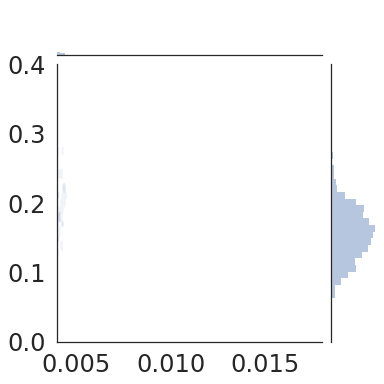

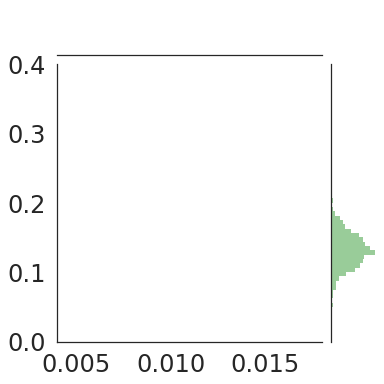

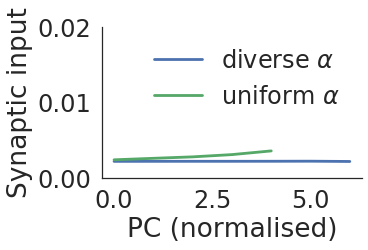

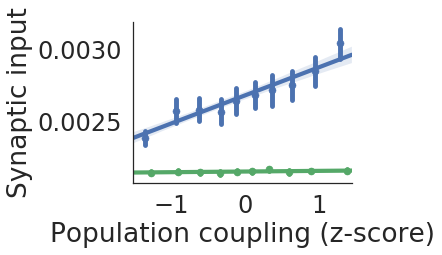

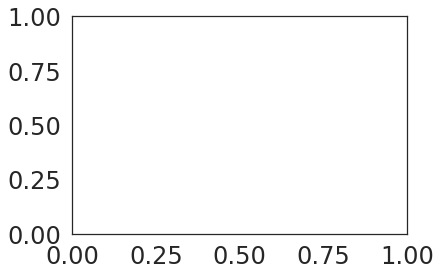

In [863]:
save_fig=False

sns.set(style="white",context='poster',font_scale=1.5)

sns.set_color_codes("dark")
sns.jointplot(np.array(corr_connprob).flatten(),np.array(corr_pc).flatten(),kind='hex',xlim=(0.004,0.018),ylim=(0.0,0.4),stat_func=None)

sns.jointplot(np.array(uniform_connprob).flatten(),np.array(uniform_pc).flatten(),kind='hex',color='green',xlim=(0.004,0.018),ylim=(0.0,0.4),stat_func=None)


sns.set(style="white",context='poster',font_scale=1.5)
sns.set_color_codes("dark")

f, ax = plt.subplots(figsize=(6, 4))
digit = np.digitize(np.array(uniform_pc).flatten(),np.arange(0.15,0.2,0.01))
ax.plot([np.mean(np.array(uniform_connprob).flatten()[digit==i]) for i in xrange(8)])
digit = np.digitize(np.array(corr_pc).flatten(),np.arange(0.1,0.4,0.05))
ax.plot([np.mean(np.array(corr_connprob).flatten()[digit==i]) for i in xrange(8)])
ax.set_xlabel('PC (normalised)')
ax.set_ylabel('Synaptic input')
sns.despine()
ax.set_ylim(0.0,.02)
ax.legend(['diverse '+r'$\alpha$','uniform '+r'$\alpha$'],loc='upper right')

sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/PCwidth_V_input.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/PCwidth_V_input_legend.png',dpi=400)
    

f, ax = plt.subplots(figsize=(6, 4))

sns.regplot(stats.zscore(np.array(corr_pc).flatten()), y=np.array(corr_connprob).flatten(),x_bins=10) 
sns.regplot(stats.zscore(np.array(uniform_pc).flatten()), y=np.array(uniform_connprob).flatten(),x_bins=10)
#ax.legend(['diverse '+r'$\alpha$','uniform '+r'$\alpha$'],loc='upper right')
ax.set_xlabel('Population coupling (z-score)')
ax.set_ylabel('Synaptic input')

sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/PCwidth_V_input.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/PCwidth_V_input.png',dpi=400)
    
    
    
f, ax = plt.subplots(figsize=(6, 4))
ax.hist([corr_pc,uniform_pc],12,normed=False,histtype='step',lw=5,label=['diverse '+r'$\alpha$','uniform '+r'$\alpha$'])
ax.set_xlabel('Population coupling')
ax.set_ylabel('count')
#plt.legend(loc='upper right')

sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/PCwidth_V_input.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/PC_hist.png',dpi=400)


    
f, ax = plt.subplots(figsize=(6, 4))
ax.hist([corr_W,uniform_W],15,normed=True,histtype='step',lw=5,label=['diverse '+r'$\alpha$','uniform '+r'$\alpha$'])
ax.set_xlabel('Synaptic weights')
ax.set_ylabel('pdf')
ax.set_xlabel('Synaptic weights')
ax.set_ylabel('pdf')
#ax.legend(loc='upper right')

sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/W_dists.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/W_dist.pdf',dpi=400)

f, ax = plt.subplots(figsize=(6, 4))
ax.hist([corr_connprob,uniform_connprob],25,normed=True,histtype='step',lw=5,label=['diverse '+r'$\alpha$','uniform '+r'$\alpha$'])
ax.set_xlabel('Summed synaptic input')
ax.set_ylabel('Count')
#plt.axvline(np.mean(corr_connprob), color='b', linestyle='dashed', linewidth=2)
#plt.axvline(np.mean(uniform_connprob), color='g', linestyle='dashed', linewidth=2)
#ax.legend(loc='upper right')
sns.despine()
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/W_dists.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/W_sum_dist.png',dpi=400)
        

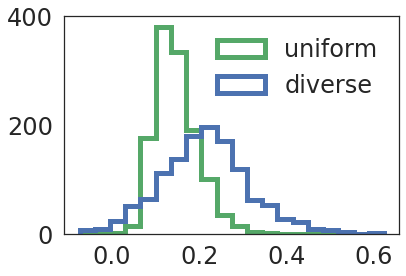

Text(0,0.5,u'Synaptic input')

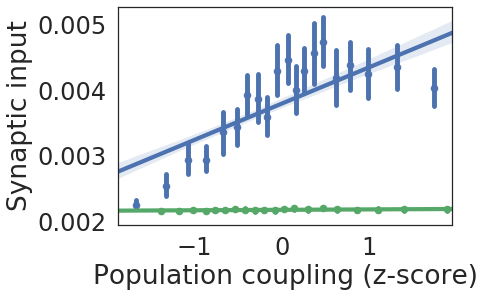

In [325]:
plt.figure()
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten()],20,label=['diverse','uniform'],normed=False,histtype='step',lw=5);
plt.legend()




save_fig = False
#if save_fig:
    #tikz_save('manuscript/figures/summary_stats_ABI.tex',
    #       figureheight = '\\figureheight',
    #       figurewidth = '\\figurewidth')
    #plt.savefig('population_coupling_dist_alpha_range_100_ext_OU_sigma_7.pdf',dpi=600)

plt.show()
save_fig = False

f, ax = plt.subplots(figsize=(6, 4))

sns.regplot(stats.zscore(np.array(corr_pc).flatten()), y=np.array(corr_connprob).flatten(),x_bins=20)
sns.regplot(stats.zscore(np.array(uniform_pc).flatten()), y=np.array(uniform_connprob).flatten(),x_bins=20)
#ax.legend(['diverse '+r'$\alpha$','uniform '+r'$\alpha$'],loc='upper right')
ax.set_xlabel('Population coupling (z-score)')
ax.set_ylabel('Synaptic input')

ValueError: x must have 2 or fewer dimensions

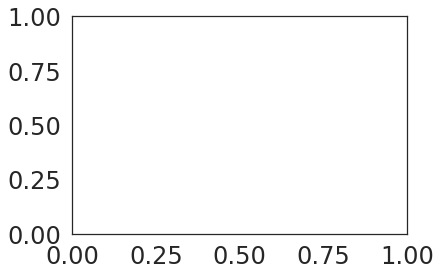

In [864]:
f, ax = plt.subplots(figsize=(6, 4))
ax.hist([corr_pc,uniform_pc],12,normed=False,histtype='step',lw=5,label=['diverse '+r'$\alpha$','uniform '+r'$\alpha$'])
ax.set_xlabel('Population coupling')
ax.set_ylabel('count')

In [69]:
RF_results

[{'W_corr': array([[ 0.        ,  0.03476918,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.01316885,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         [ 0.        ,  0.02414087,  0.02995097, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.01809068,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.03333408,
           0.        ,  0.        ]]),
  'W_uniform': array([[ 0.        ,  0.02132129,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.03906836,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         

# ABI analysis

In [279]:
#### import glob
#ABI_results = glob.glob('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/*preserved_pc.pkl')
import os
import pandas as pd

data_files = os.listdir('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/boc/ophys_experiment_data/')

data_sets = []
for data_file in data_files:
    data_sets.append(int(data_file.partition('.')[0]))

diff_ori_dg = []
diff_tf_dg = []
mean_popcorr_diff_ori_dg_diff = []

diff_ori_sg = []
diff_sf_sg = []
mean_popcorr_diff_ori_sg_diff = []


combined_popcorr_diff_ori = []
combined_popcorr_nodiff_ori = []

combined_popcorr_diff_tf = []
combined_popcorr_nodiff_tf = []
combined_popcorr_diff_sf = []
combined_popcorr_nodiff_sf = []

combined_popcorr_diff_vis= []
combined_popcorr_nodiff_vis = []

combined_popcorrs_mean = []
combined_popcorrs_std = []
combined_ori_change = []
combined_sf_tf_change = []
combined_rates_mean = []
combined_rates_std = []
combined_peak_sf = []
combined_ori_before = []
combined_ori_after = []

combined_osi = []
combined_dsi = []
combined_vis = []

combined_reliability_before = []
combined_reliability_after = []

combined_events_before = []
combined_events_after = []

combined_popcorrs_means_reliable_25pc = []
combined_ori_change_reliable_25pc = []

data_sets[10]

ttest_stats = []
ttest_stats_rates = []
ttest_pval = []
# 503109347 a clear example for cumulative hist difference

counter = 0
N_250_idcs = [] 
N_50_idcs = []

Ncells_exp = []

PC_thresh = 0.3

include_dg = True
include_sg = False

for data_set in data_sets:
    try:
        res = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_preserved_pc.pkl')    
        popcorr_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_pc_bins.pkl')  
        rates_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_rates_bins.pkl')    
        print 'loading'
    except:
        print 'no analysis for dataset ', data_set
        continue
        
    if res.has_key('ori_dg') and len(res['ori_dg'][0])>50 and include_dg:
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        Ncells_exp.append(len(res['ori_dg'][0]))
        #if res.has_key('ori_dg') and len(res['ori_dg'][0])>250:
        N_250_idcs.append(counter)
        #else:
        #N_50_idcs.append(counter)
            
        counter +=1 

        diff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])<1
        
        diff_tf_dg = np.abs(res['tf_dg'][0] - res['tf_dg'][1])>0
        nodiff_tf_dg = np.abs(res['tf_dg'][0] - res['tf_dg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_dg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_dg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(45.0*np.abs(res['ori_dg'][0] - res['ori_dg'][1]))
        combined_ori_before.extend(res['ori_dg'][0])
        combined_ori_after.extend(res['ori_dg'][1])
        combined_sf_tf_change.extend(np.abs(res['tf_dg'][0] - res['tf_dg'][1]))
        combined_peak_sf.extend((res['peak_dff_dg'][0] + res['peak_dff_dg'][1]))

        combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_tf_dg>0)]))
        combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(res['osi_dg'][0]))
        combined_dsi.extend(list(res['dsi_dg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_dg'][0])
        combined_reliability_after.extend(res['response_reliability_dg'][1])
        
        reliability_before_25pc = np.percentile(res['response_reliability_dg'][0],25) 
        
        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
        
        combined_popcorrs_means_reliable_25pc.extend(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc]))
        combined_ori_change_reliable_25pc.extend(list(45.0*np.abs(res['ori_dg'][0] - res['ori_dg'][1])[res['response_reliability_dg'][0]>reliability_before_25pc]))
    
        diff_ori_dg_reliable_25pc = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])>0
        nodiff_ori_dg_reliable_25pc = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])<1

        #ttest_stats.append(np.mean(combined_popcorr_diff_tf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_dg>0)]))/np.mean(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_dg>0)])))
        #ttest_stats_reliable_25pc.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc][np.where(nodiff_ori_dg_reliable_25pc>0)]))/np.mean(p.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_sg'][0]>reliability_before_25pc][np.where(nodiff_ori_dg_reliable_25pc>0)]))

        #ttest_stats.append(np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        #ttest_stats_rates.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_dg'][0] - res['ori_dg'][1]))

        
    if res.has_key('ori_sg') and len(res['ori_sg'][0])>50 and include_sg:
        print 'sg'
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        Ncells_exp.append(len(res['ori_sg'][0]))
        #if res.has_key('ori_sg') and len(res['ori_sg'][0])>250:
        #N_250_idcs.append(counter)
        #else:
        N_50_idcs.append(counter)
        counter +=1 
        diff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])>0
        nodiff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])<1
        
        diff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])>0
        nodiff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_sg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_sg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(30.0*np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        combined_ori_before.extend(res['ori_sg'][0])
        combined_ori_after.extend(res['ori_sg'][1])
        combined_sf_tf_change.extend(np.abs(res['sf_sg'][0] - res['sf_sg'][1]))
        combined_peak_sf.extend((res['peak_dff_sg'][0] + res['peak_dff_sg'][1]))

        combined_popcorr_diff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_sf_sg>0)]))
        combined_popcorr_nodiff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_sf_sg>0)]))
        
        combined_osi.extend(list(res['osi_sg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_sg'][0])
        combined_reliability_after.extend(res['response_reliability_sg'][1])
 
        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
        
        reliability_before_25pc = np.percentile(res['response_reliability_sg'][0],25) 

        
        combined_popcorrs_means_reliable_25pc.extend(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_sg'][0]>reliability_before_25pc]))
        combined_ori_change_reliable_25pc.extend(list(45.0*np.abs(res['ori_sg'][0] - res['ori_sg'][1])[res['response_reliability_sg'][0]>reliability_before_25pc]))
 
        
        #ttest_stats.append(np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_sf))
        ttest_stats.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_ori_sg>0)]))/np.mean(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_ori_sg>0)])))
        #ttest_stats_reliable_25pc.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_sg'][0]>reliability_before_25pc][np.where(nodiff_ori_sg>0)]))/np.mean(p.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_sg'][0]>reliability_before_25pc][np.where(nodiff_ori_sg>0)]))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))

        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        

loading
loading
no analysis for dataset  530645663
no analysis for dataset  512326618
loading
(-0.089206062813630554, 0.14376296373380434)
no analysis for dataset  501704220
no analysis for dataset  501836392
loading
(-0.044488457093512852, 0.50011942791495168)
loading
no analysis for dataset  501886692
loading
(0.13791537567824627, 0.0094752591029664598)
loading
loading
(0.086354098036044866, 0.23993345344702516)
loading
(-0.027209526398864488, 0.68815676961977246)
loading
no analysis for dataset  526928092
no analysis for dataset  530773844
no analysis for dataset  509962140
no analysis for dataset  529693740
loading
no analysis for dataset  512311673
no analysis for dataset  510221121
loading
loading
(0.092365743692950336, 0.1121761838841107)
loading
no analysis for dataset  501876401
no analysis for dataset  528480613
loading
loading
no analysis for dataset  512270518
no analysis for dataset  502666254
loading
(-0.10115320621972648, 0.089415719763209112)
loading
no analysis for dat

In [3]:
def partial_corr(x,y,z,plot=True,color='b',xlabel='x',ylabel='y ',title='network'):
    beta_i = scipy.stats.linregress(z, x)
    beta_j = scipy.stats.linregress(z, y)

    line_x = beta_i[1] + np.multiply(beta_i[0],z)
    line_y =  beta_j[1] + np.multiply(beta_j[0],z)

    #print beta_i,beta_j

    #plt.scatter(x,line_x)
    #plt.scatter(y,line_y,color='r')

    res_j = np.subtract(y,line_y)
    res_i = np.subtract(x,line_x)

    corr = scipy.stats.spearmanr(res_i, res_j)
    print 'partial correlation', corr

    if plot:
        fig,axes=plt.subplots()
        plt.scatter(res_j,res_i,color=color)
        plt.title('Residuals ,' + title + ' ; ' + str(corr[0])+ ' ' + str(corr[1]))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

print scipy.stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_popcorrs_mean)>0.25],np.array(combined_ori_change)[np.array(combined_popcorrs_mean)>0.25])
print scipy.stats.spearmanr(np.array(combined_popcorrs_mean),np.array(combined_ori_change))
print scipy.stats.pearsonr(np.array(combined_popcorrs_std),np.array(combined_ori_change))
print scipy.stats.pearsonr(np.array(combined_popcorrs_mean),np.array(combined_rcipy.stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_popcorrs_mean)>0.25]ates_mean))
print scipy.stats.pearsonr(np.array(combined_popcorrs_mean),np.array(combined_rates_std))
print scipy.stats.spearmanr(np.array(combined_rates_mean),np.array(combined_ori_change))
print scipy.stats.spearmanr(np.array(combined_peak_sf),np.array(combined_ori_change))
print partial_corr(np.array(combined_popcorrs_mean),np.array(combined_ori_change),np.array(combined_peak_sf),False)

print np.std(bootstrap_resample(np.array(combined_ori_change),int(1e6)))
print np.percentile(bootstrap_resample(np.array(combined_ori_change),int(1e6)),90)
print np.percentile(bootstrap_resample(np.array(combined_ori_change),int(1e6)),10)
print np.mean(bootstrap_resample(np.array(combined_ori_change),int(1e6)))
print np.std(bootstrap_resample(np.array(combined_ori_before),int(1e6)))
print np.std(bootstrap_resample(np.array(combined_ori_after),int(1e6)))


print np.percentile(bootstrap_resample(np.array(combined_ori_before),int(1e6)),35)


SpearmanrResult(correlation=0.063358548635900791, pvalue=3.1066177492344783e-10)
SpearmanrResult(correlation=0.051003812785522386, pvalue=2.8176210935617892e-10)
(0.018309155356100067, 0.023616256023055851)
(-0.0016450799465770355, 0.83886752106164919)
(-0.043815041200511266, 6.0130041297518694e-08)
SpearmanrResult(correlation=-0.013533929470957688, pvalue=0.094336232624490007)
SpearmanrResult(correlation=-0.24034074051556747, pvalue=1.0537297775929661e-199)
partial correlation SpearmanrResult(correlation=0.022324188698058415, pvalue=0.0057845132635127661)
None
76.5191081818
180.0
0.0
67.621095
2.0983212246
2.1143955177
2.0


([array([ 161818.,  140336.,  138190.,       0.,  148632.,  146410.,
               0.,  128778.,   73554.,   62282.]),
  array([ 149512.,  156739.,  146998.,       0.,  136227.,  145336.,
               0.,  132072.,   72395.,   60721.])],
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 2 Lists of Patches objects>)

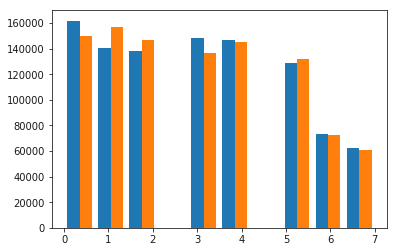

In [7]:
plt.hist([bootstrap_resample(np.array(combined_ori_after),int(1e6)),bootstrap_resample(np.array(combined_ori_before),int(1e6))])

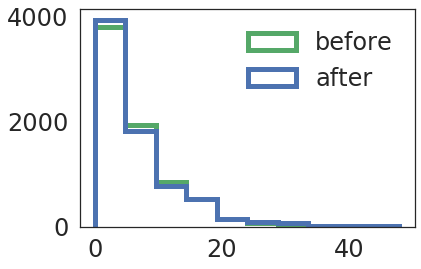

In [645]:
plt.hist([np.array(combined_reliability_after),np.array(combined_reliability_before)],histtype='step',lw=5,label=['after','before'])
plt.legend()

(-0.26836747350418511, 1.7799264529257934e-130)
(-0.014184371163487929, 0.20730978890850085)
partial correlation SpearmanrResult(correlation=0.036317515021396102, pvalue=0.0012398632922799098)
SpearmanrResult(correlation=0.071201242643341309, pvalue=1.2392222376666087e-09)


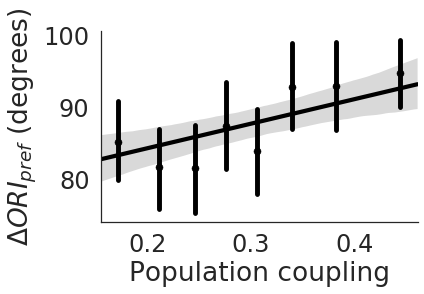

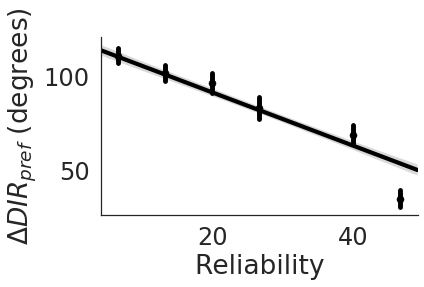

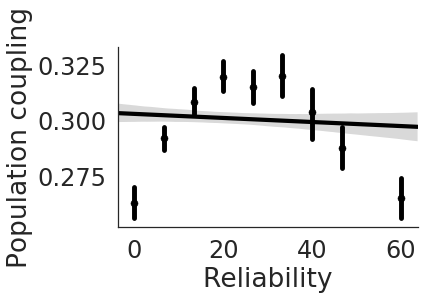

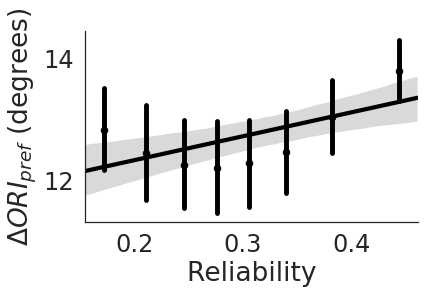

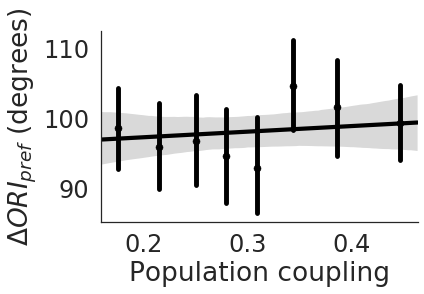

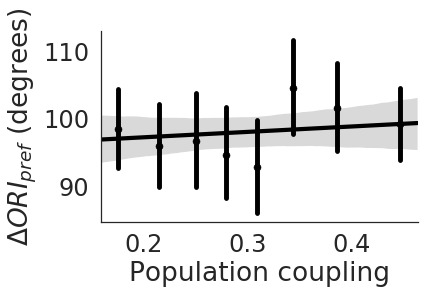

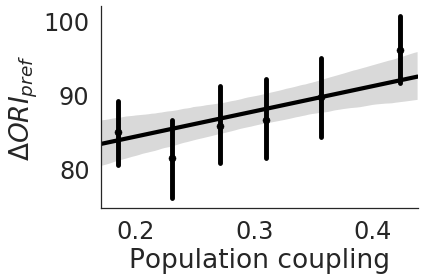

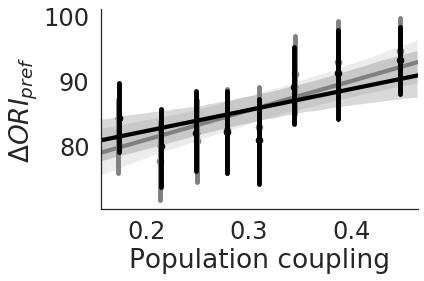

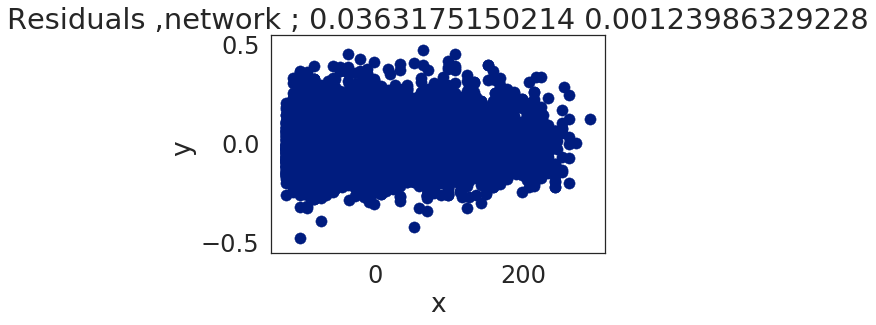

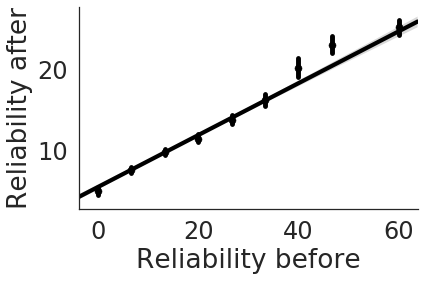

In [280]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=8,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()


plt.figure()
sns.regplot(np.array(combined_reliability_before),np.array(combined_ori_change),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('Reliability')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta DIR_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.tight_layout()
#plt.savefig('drifting gratings_reliability_VS_ori_change.pdf')


print scipy.stats.pearsonr(np.array(combined_reliability_before),np.array(combined_ori_change))

plt.figure()
sns.regplot(np.array(combined_reliability_before),np.array(combined_popcorrs_mean),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('Reliability')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('Population coupling')
plt.tight_layout()
#plt.savefig('drifting gratings_reliability_VS_pop_corr_ori.pdf')

print scipy.stats.pearsonr(np.array(combined_reliability_before),np.array(combined_popcorrs_mean))


plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_reliability_after),x_bins=8,color='black',logistic=False)
sns.despine()
plt.xlabel('Reliability')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)<35],np.array(combined_ori_change)[[np.array(combined_reliability_before)<35]],x_bins=8,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)<35],np.array(combined_ori_change)[[np.array(combined_reliability_before)<35]],x_bins=8,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_rates_mean),x_bins=6,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>0],np.array(combined_ori_change)[np.array(combined_reliability_before)>0],x_bins=8,color='gray',logistic=False)
#sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_reliability_after),x_bins=8,color='black',logistic=False)
#sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=8,color='gray',logistic=False)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>0],np.array(combined_ori_change)[np.array(combined_reliability_before)>0],x_partial=np.array(combined_reliability_before)[np.array(combined_reliability_before)>0],x_bins=8,color='black',logistic=False)
sns.despine()
#plt.legend(['controlling for reliability','not controlling for reliability'])
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()
#plt.savefig('drifting gratings_reliability_confound_ori.pdf')
partial_corr(combined_popcorrs_mean,combined_ori_change,combined_reliability_before)

print stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>0],np.array(combined_ori_change)[np.array(combined_reliability_before)>0])
    
plt.figure()
sns.regplot(np.array(combined_reliability_before),np.array(combined_reliability_after),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('Reliability before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('Reliability after')
plt.tight_layout()


(-0.010984049545601325, 0.34556902393505773)


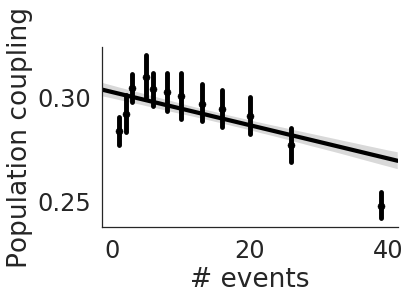

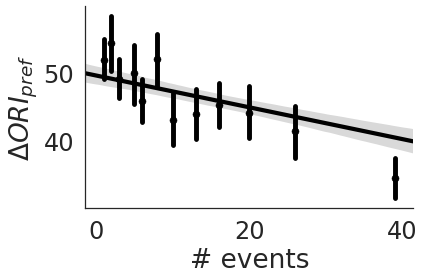

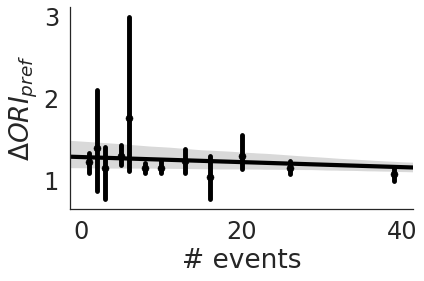

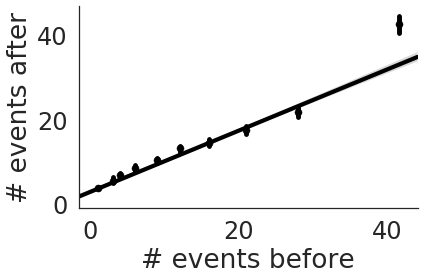

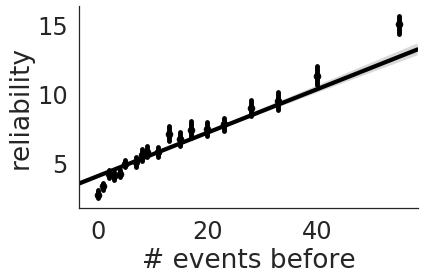

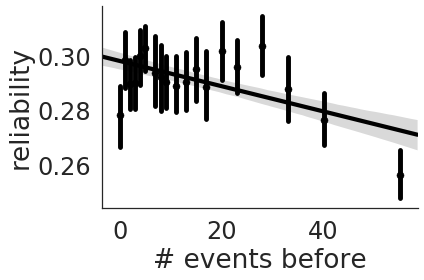

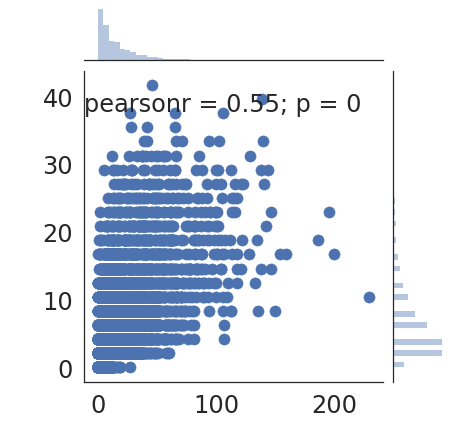

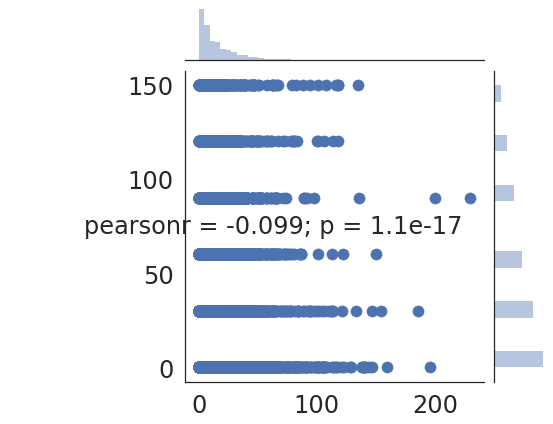

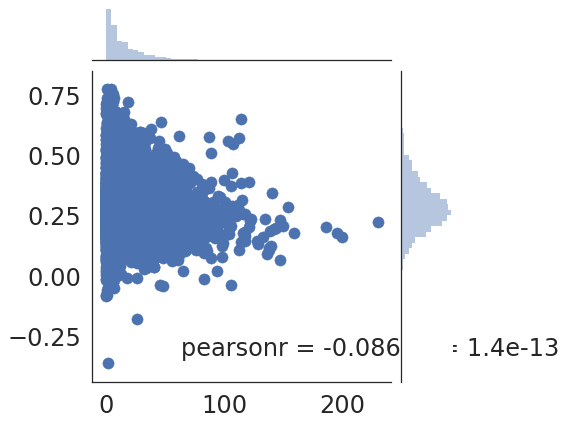

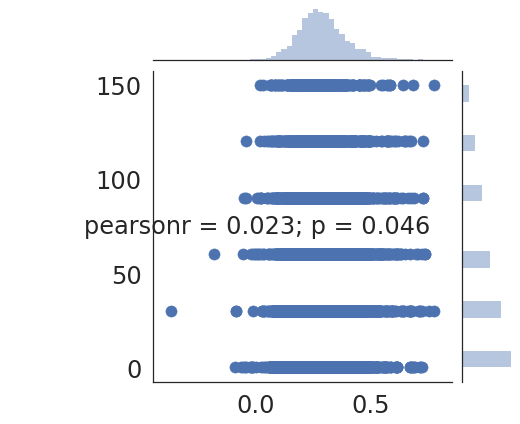

In [254]:
plt.figure()
sns.regplot(np.array(combined_events_after),np.array(combined_popcorrs_mean),x_bins=12,color='black',order=1,logistic=False)
sns.despine()
plt.xlabel('# events')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('Population coupling')
plt.tight_layout()
#plt.savefig('events_Vs_PC.png')

plt.figure()
sns.regplot(np.array(combined_events_after),np.array(combined_ori_change),x_bins=12,color='black',order=1,logistic=False)
sns.despine()
plt.xlabel('# events')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()
#plt.savefig('events_Vs_ORI_change.png')

plt.figure()
sns.regplot(np.array(combined_events_after),np.array(combined_osi),x_bins=12,color='black',order=1,logistic=False)
sns.despine()
plt.xlabel('# events')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()
#plt.savefig('events_Vs_OSI.png')


print scipy.stats.pearsonr(np.array(combined_events_after),np.array(combined_osi))

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_events_after),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('# events after')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_reliability_before),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('reliability')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_popcorrs_mean),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('reliability')
plt.tight_layout()

sns.jointplot(np.array(combined_events_before),np.array(combined_reliability_before))

sns.jointplot(np.array(combined_events_before),np.array(combined_ori_change))

sns.jointplot(np.array(combined_events_before),np.array(combined_popcorrs_mean))

sns.jointplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change))

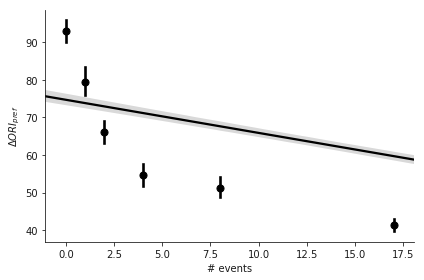

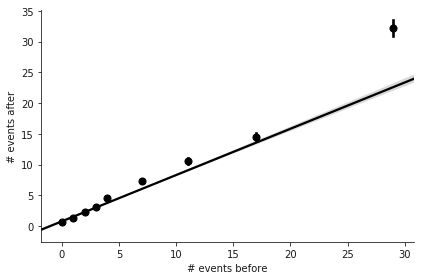

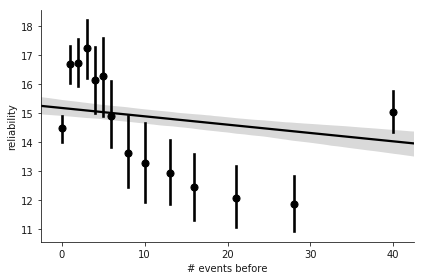

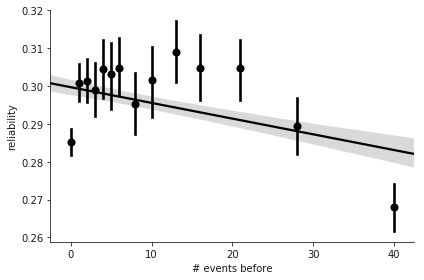

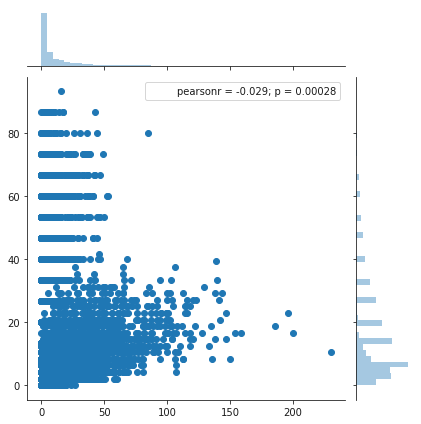

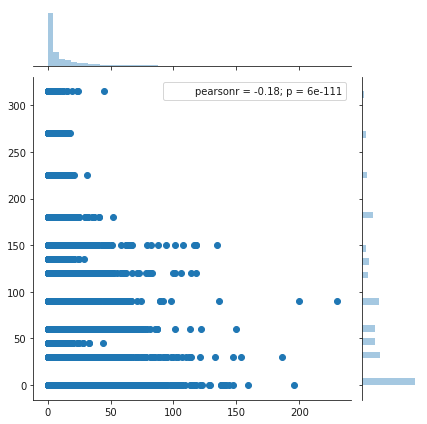

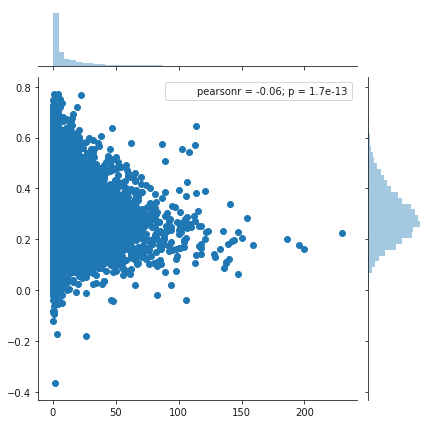

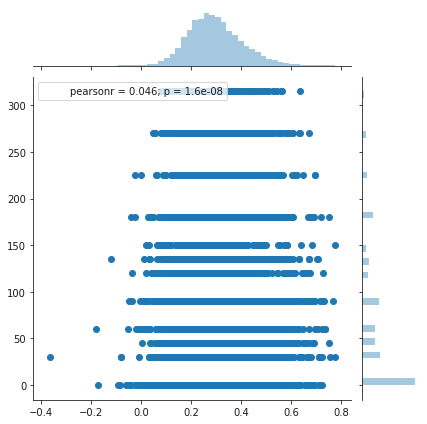

In [9]:
plt.figure()
sns.regplot(np.array(combined_events_after),np.array(combined_ori_change),x_bins=6,color='black',order=1,logistic=False)
sns.despine()
plt.xlabel('# events')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_events_after),x_bins=10,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('# events after')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_reliability_before),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('reliability')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_events_before),np.array(combined_popcorrs_mean),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('# events before')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel('reliability')
plt.tight_layout()

sns.jointplot(np.array(combined_events_before),np.array(combined_reliability_before))

sns.jointplot(np.array(combined_events_before),np.array(combined_ori_change))

sns.jointplot(np.array(combined_events_before),np.array(combined_popcorrs_mean))

sns.jointplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change))

In [1]:
res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/501889084_early_events.pkl')  


NameError: name 'pd' is not defined

(array([ 1915.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     5.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

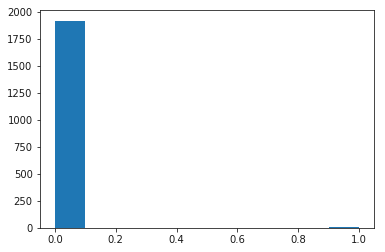

In [64]:
plt.hist(res_events_late[-1].flatten())

In [31]:
from allensdk.brain_observatory.receptive_field_analysis import eventdetection

In [98]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file='/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/boc/manifest.json')
data_set = boc.get_ophys_experiment_data(539525014)

In [40]:
events = eventdetection.detect_events?

In [58]:
events = eventdetection.detect_events(data_set,1,'drifting_gratings')

MissingStimulusException: Stimulus not found: drifting_gratings_stimulus

(array([  1.33220000e+04,   1.39400000e+03,   3.76000000e+02,
          1.04000000e+02,   5.30000000e+01,   1.60000000e+01,
          1.20000000e+01,   0.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.,   23.,   46.,   69.,   92.,  115.,  138.,  161.,  184.,
         207.,  230.]),
 <a list of 10 Patch objects>)

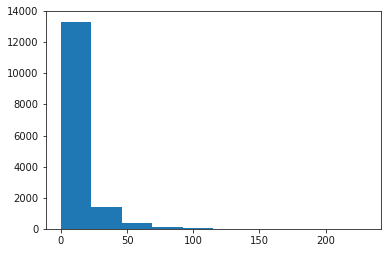

In [128]:
plt.hist(np.array(combined_events_before).flatten())

In [95]:
data_set.STIMULUS_TABLE_TYPES

AttributeError: 'int' object has no attribute 'STIMULUS_TABLE_TYPES'

In [103]:
res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(539525014)+'_early_events.pkl')    
res = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(539525014)+'_preserved_pc.pkl')    
res.has_key('ori_sg')
data_set.list_stimuli()
res.keys()

['peak_dff_sg',
 'ptest_sg',
 'osi_sg',
 'phase_sg',
 'osi',
 'vis',
 'response_reliability_sg',
 'sf_sg']

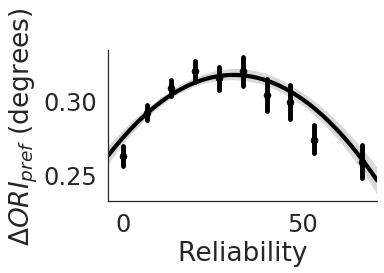

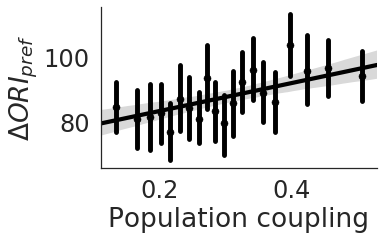

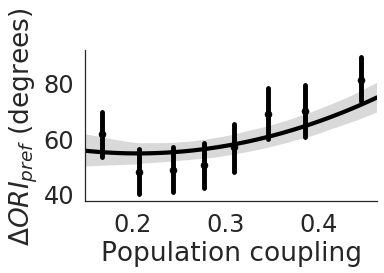

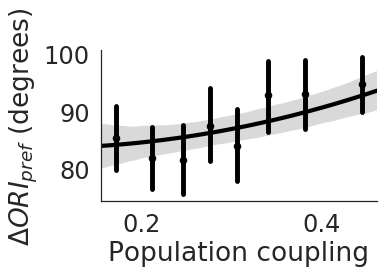

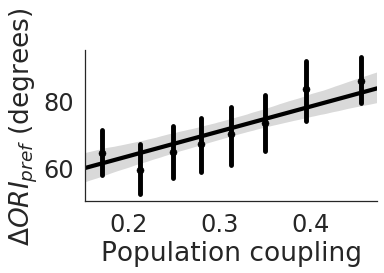

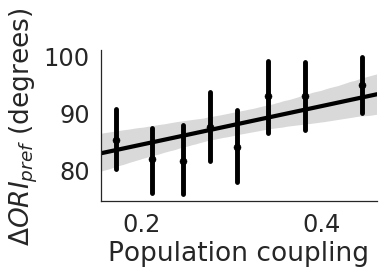

In [165]:
plt.figure()
sns.regplot(np.array(combined_reliability_before),np.array(combined_popcorrs_mean),x_bins=30,order=2,color='black',logistic=False)
sns.despine()
plt.xlabel('Reliability')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()


plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_partial=np.array(combined_reliability_after),x_bins=20,color='black',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>25],np.array(combined_ori_change)[[np.array(combined_reliability_before)>25]],x_bins=8,order=2,color='black',logistic=False)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=8,color='black',order=2,logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>15],np.array(combined_ori_change)[[np.array(combined_reliability_before)>15]],x_bins=8,order=1,color='black',logistic=False)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=8,color='black',order=1,logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

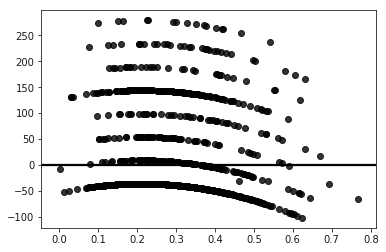

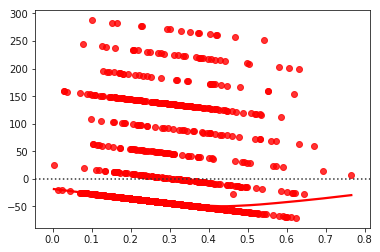

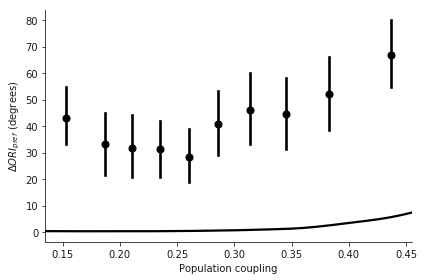

In [196]:
plt.figure()
sns.residplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],order=2,lowess=True,color='black')
plt.figure()
sns.residplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],order=1,lowess=True,color='red')

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,lowess=True,color='black',logistic=False)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()

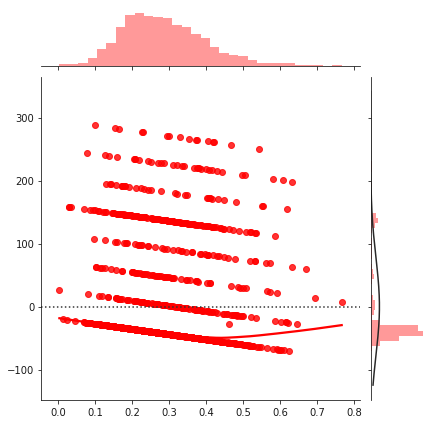

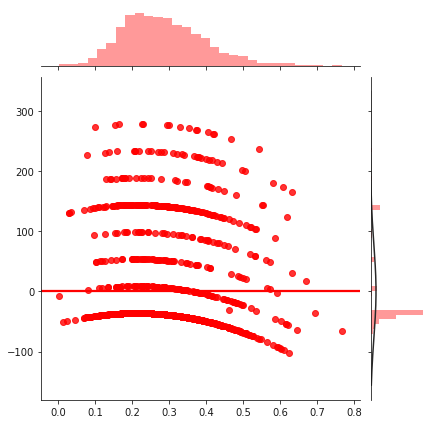

In [197]:
sns.jointplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],order=1,kind='resid',lowess=True,color='red')
sns.jointplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],order=2,kind='resid',lowess=True,color='red')


In [188]:
p, residuals, _, _, _ = np.polyfit(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[np.array(combined_reliability_before)>35], 2, full=True)

chisq_dof = residuals / (len(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35]) - 3)

chi_squared = np.sum((np.polyval(p, np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35]) - np.array(combined_ori_change)[np.array(combined_reliability_before)>35]) ** 2)

In [191]:
chisq_dof
#chi_squared

array([ 5962.20029035])

1.05047490885
Ttest_1sampResult(statistic=4.8973527538226866, pvalue=7.0971788823284834e-06)
0.0
0.0


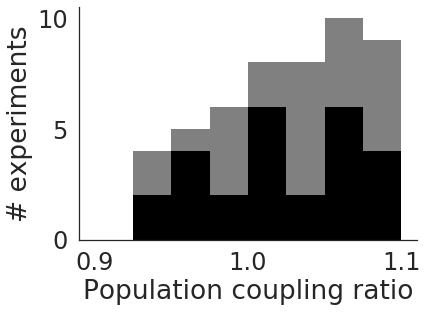

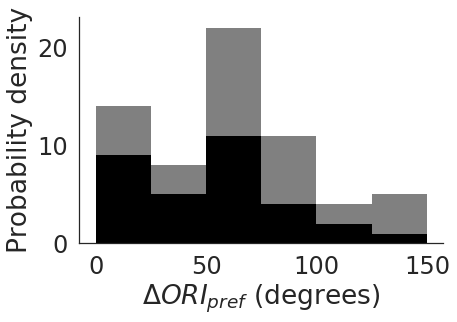

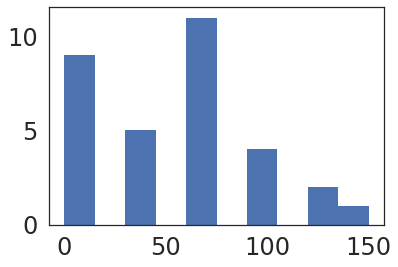

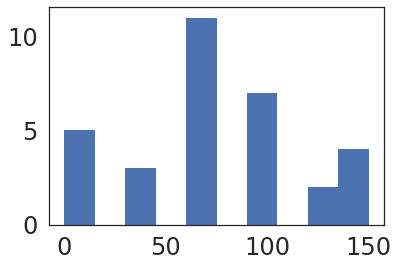

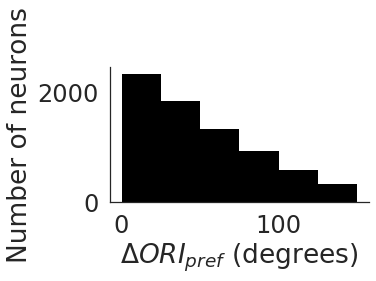

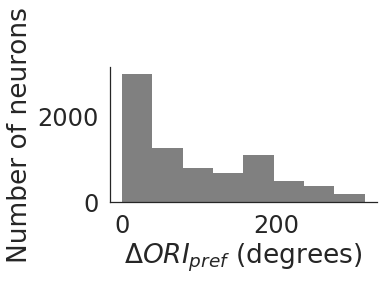

In [1078]:
save_fig=False

f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([np.array(ttest_stats)[N_50_idcs],np.array(ttest_stats)[N_250_idcs]],color=['black','gray'],histtype='barstacked',range=(0.90,1.1),bins=8)


print np.mean(ttest_stats)
print stats.ttest_1samp(ttest_stats,1.0)

print float(sum(np.array(ttest_pval)<0.0005))/len((np.array(ttest_pval)))
ax.set_ylabel('# experiments')
#ax.set_xlabel(r'$\Delta ORI_{pref}^ {high PC} - \Delta ORI_{pref}^{low PC}$')
ax.set_xlabel('Population coupling ratio')

sns.despine(left=False, bottom=False)

#ax.legend(['static gratings', 'drifting gratings'],loc='upper left',fontsize=22)
#ax.legend(['*', 'n.s.'],loc='upper left')
plt.tight_layout()

if save_fig:
    tikz_save('manuscript/figures/summary_stats_ABI.tex',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    plt.savefig('manuscript/figures/summary_stats_PC_ratio.png',dpi=600)


f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([np.array(ttest_stats_rates)[N_50_idcs],np.array(ttest_stats_rates)[N_250_idcs]],color=['black','gray'],histtype='barstacked',bins=25)
print float(sum(np.array(ttest_pval)<0.0005))/len((np.array(ttest_pval)))
ax.set_ylabel('# Experiments')
sns.despine(left=False, bottom=False)

#ax.legend(['static gratings', 'drifting gratings'],loc='upper right',fontsize=22)
#ax.legend(['*', 'n.s.'],loc='upper left')
plt.tight_layout()



plt.hist([np.array(combined_ori_change)[N_50_idcs],np.array(combined_ori_change)[N_250_idcs]],6,color=['black','gray'],histtype='barstacked',normed=False)
plt.ylabel('Probability density')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
sns.despine()
#plt.legend(loc='Upper right')
plt.tight_layout()
plt.savefig('manuscript/figures/Delta_ORIpref.png')

plt.figure()
plt.hist(np.array(combined_ori_change)[N_50_idcs])

plt.figure()
plt.hist(np.array(combined_ori_change)[N_250_idcs])


plt.figure()
plt.hist([ori_change_sg],6,color=['black'],normed=False)
plt.ylabel('Number of neurons')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
sns.despine()
plt.tight_layout()
plt.savefig('manuscript/figures/Delta_ORIpref_sg.png')


plt.figure()
plt.hist([ori_change_dg],8,color=['gray'],normed=False)
plt.ylabel('Number of neurons')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
sns.despine()
plt.tight_layout()
plt.savefig('manuscript/figures/Delta_ORIpref_dg.pdf')


#plt.scatter(ttest_stats,[[x,x] for x in Ncells_exp])

In [15]:
combined_ori_change

np.where((a >= 6) & (a <=10))

15281

In [167]:
combined_ori_change_arr = np.array(combined_ori_change)
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)

combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))]

array([  45.,   45.,  180., ...,   45.,  135.,    0.])

In [168]:
print np.mean(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))])
print np.mean(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.4))])
print np.mean(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])


104.6875
85.6255946717
95.5360824742


(array([   5.,    8.,   22.,   61.,  101.,  164.,  170.,  157.,  125.,
         102.,   73.,   55.,   26.,   25.,   13.,   10.,   10.,    7.,
           5.,    1.]),
 array([  5.50910386e-04,   3.88267614e-02,   7.71026125e-02,
          1.15378463e-01,   1.53654315e-01,   1.91930166e-01,
          2.30206017e-01,   2.68481868e-01,   3.06757719e-01,
          3.45033570e-01,   3.83309421e-01,   4.21585272e-01,
          4.59861123e-01,   4.98136974e-01,   5.36412825e-01,
          5.74688676e-01,   6.12964527e-01,   6.51240378e-01,
          6.89516229e-01,   7.27792080e-01,   7.66067931e-01]),
 <a list of 20 Patch objects>)

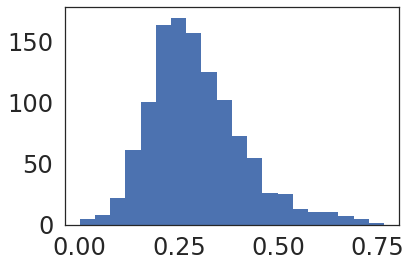

In [609]:
plt.hist(combined_popcorrs_mean_arr,20)

In [53]:
bplot1 =plt.bar(range(3),[np.mean(slow_spec_means),np.mean(fast_spec_means)],yerr=[np.std(slow_spec_means),np.std(fast_spec_means)],color=['black','gray'],ecolor=['black','gray'])



TypeError: 'AxesSubplot' object does not support indexing

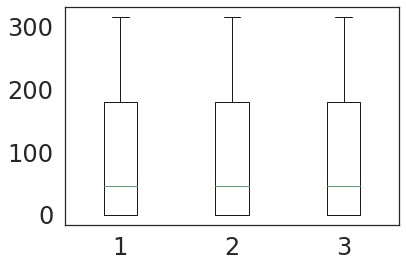

F_onewayResult(statistic=5.5184049864923752, pvalue=0.0040277202300640635)
Ks_2sampResult(statistic=0.11660883783999354, pvalue=0.039652037884198924)
Ks_2sampResult(statistic=0.046515102441358924, pvalue=0.0074490422497016989)


In [177]:
plt.boxplot([combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.45))] ])
plt.show()

print scipy.stats.f_oneway(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.45))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.45))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))])


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0    2.9815  -2.8979 8.8609 False 
 0.0    2.0    9.5771   3.4931 15.661  True 
 1.0    2.0    6.5956   0.5122 12.679  True 
--------------------------------------------


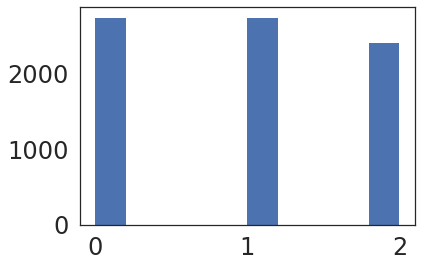

In [175]:
change_labels = np.ones(combined_ori_change_arr.shape) 

change_labels[(combined_popcorrs_mean_arr<0.25)] = 0
change_labels[(combined_popcorrs_mean_arr>0.35)] = 2
plt.hist(change_labels)

print(pairwise_tukeyhsd(combined_ori_change_arr,change_labels))

In [92]:
change_labels = np.ones(combined_ori_change_arr.shape) 

change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2

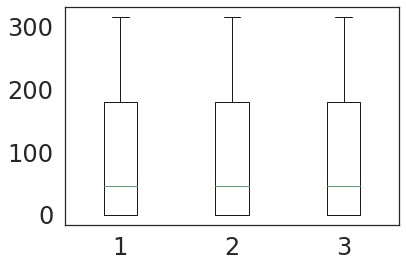

F_onewayResult(statistic=5.5184049864923752, pvalue=0.0040277202300640635)
Ks_2sampResult(statistic=0.11660883783999354, pvalue=0.039652037884198924)
Ks_2sampResult(statistic=0.046515102441358924, pvalue=0.0074490422497016989)


In [178]:
plt.boxplot([combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.25))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.25) & (combined_popcorrs_mean_arr<0.35))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.35))] ])
plt.show()

print scipy.stats.f_oneway(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.45))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.1))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.1) & (combined_popcorrs_mean_arr<0.45))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.35))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.25) & (combined_popcorrs_mean_arr<0.35))])


In [101]:
allpairtest(stats.ttest_rel, method='Holm')

In [127]:
len(np.arange(20,120,(100.0)/21))

21

In [128]:
import networkx as nx
import py_scripts_yann
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

from pylab import *
from matplotlib2tikz import save as tikz_save

import run_RF_net

import json

import launch_RF_net_multiproc

RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/199/RF_net_N_250_target_p5_Wmax_2_alpha_normal_20_10_homogbase_5_scaling_p5_eta_2_OU_2p5_sweep_density_pc_measure_struct_5sims_W_density0.2ext_OU',5,False)

json_data=open('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/218/config.json').read()
RF_sim_pars = json.loads(json_data)['sim_pars']

RF_sim_pars['OU_global'] = 0.0
net_i = RF_results[0]['networks'][0]
net_i.W_conn = np.ones((100,100))
simresults_static = run_RF_net.run_RF_net(net_i,RF_sim_pars,'corr',10000,1,True)
selectivities_results_static = run_RF_net.analyse_RF_net_run_ori_group(simresults_static,net_i)

partial correlation
SpearmanrResult(correlation=0.066211491383862134, pvalue=0.29704381503815569)


In [344]:
import launch_RF_net_multiproc
reload(launch_RF_net_multiproc)
    
RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/219/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_homogbase_5_scaling_p5_eta_2_OU_5_sweep_density_pc_measure_struct_5sims_r_0_range15.0ext_OU_sigma7.0',5,False)


diverse link (0.38942468705121969, 1.7694160788515348e-10)
uniform link (0.11168416035067735, 0.077976409673095923)
diverse width 0.0420921458676
uniform width 0.0239327395101
diverse link (0.54417627229917642, 1.1317025686565418e-20)
uniform link (0.0071869787437389135, 0.90997658160837069)
diverse width 0.0365387866056
uniform width 0.0259556219642
diverse link (0.24684079675669515, 7.9951145443838851e-05)
uniform link (0.033204786797037637, 0.60130361276678301)
diverse width 0.0362920062116
uniform width 0.0271446582378
diverse link (0.38388909022028833, 3.3481351010750161e-10)
uniform link (0.098733208865328506, 0.11944855209988615)
diverse width 0.034423857821
uniform width 0.0236855338017
diverse link (0.38748750090459327, 2.2148539643580262e-10)
uniform link (0.14570953720673899, 0.021186885263952595)
diverse width 0.0392919134073
uniform width 0.0252231152256


ValueError: x must have 2 or fewer dimensions

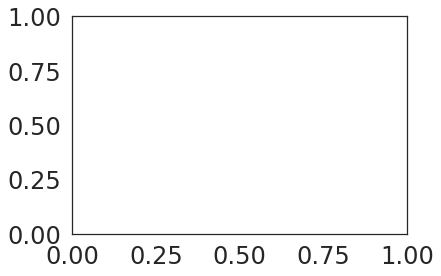

In [345]:
from scipy import stats

uniform_connprob = []
corr_connprob = []
corr_pc = []
uniform_pc = []
uniform_W = []
corr_W = []

uniform_selectivity_fluct = []
corr_selectivity_fluct = []
uniform_selectivity = []
corr_selectivity = []


#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/181/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_3_OU_5_pc_measure_struct_10sims',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain1/data/topdown_learning/RF_net_runs/116/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.0',10,False)
#    

#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/190/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.5',15,False)
    
for net_idx in xrange(len(RF_results)):
    for sim_idx in xrange(5):
        uniform_connprob.append(np.mean(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'],axis=0))
        uniform_pc.append(RF_results[net_idx]['selectivities_results_uniform'][sim_idx]['empirical_pop_coupling'])
        uniform_selectivity.append(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][-1])
        uniform_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][5:],axis=0))
        uniform_W.append(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'].flatten())
    #if RF_results[net_idx]['selectivities_results_corr'][0]['pop_coupling_partial_rval']>0.3:
        corr_connprob.append(np.mean(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'],axis=0))
        corr_pc.append(RF_results[net_idx]['selectivities_results_corr'][sim_idx]['empirical_pop_coupling'])
        corr_selectivity.append(RF_results[net_idx]['selectivities_t_corr'][sim_idx][-1])
        corr_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_corr'][sim_idx][5:],axis=0))
        corr_W.append(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'].flatten())

        print 'diverse link', stats.pearsonr(corr_pc[-1],corr_connprob[-1])
        print 'uniform link', stats.pearsonr(uniform_pc[-1],uniform_connprob[-1])
        print 'diverse width', np.std(corr_pc[-1])
        print 'uniform width', np.std(uniform_pc[-1])

plt.figure()
plt.hist([corr_connprob,uniform_connprob],10,normed=True);
plt.legend(['diverse','uniform'])

plt.figure()
plt.hist([corr_pc,uniform_pc],10,normed=True);
plt.legend(['diverse','uniform'])
print 'diverse, uniform width ', np.std(corr_pc)/np.std(uniform_pc)
print 'diverse, uniform range ', (np.max(corr_pc)-np.min(corr_pc))/(np.max(uniform_pc)-np.min(uniform_pc))
print 'diverse, uniform quartile ', (np.percentile(corr_pc,75)-np.percentile(corr_pc,25))/(np.percentile(uniform_pc,75)-np.percentile(uniform_pc,25))

sns.jointplot(np.array(corr_connprob).flatten(),np.array(corr_pc).flatten(),xlim=(0.004,0.018))
sns.jointplot(np.array(uniform_connprob).flatten(),np.array(uniform_pc).flatten(),xlim=(0.004,0.018))

sns.jointplot(np.array(corr_pc).flatten(),np.array(corr_selectivity_fluct).flatten())
sns.jointplot(np.array(uniform_pc).flatten(),np.array(uniform_selectivity_fluct).flatten())


#print 'high unif ' ,np.mean(np.array(uniform_pc[uniform_connprob>0.2]))
#print 'low unif ' ,np.mean(np.array(uniform_pc[uniform_connprob<0.2]))
                    
#print 'high diverse ' ,np.mean(np.array(corr_pc[corr_connprob>0.2]))
#print 'low diverse' ,np.mean(np.array(corr_pc[corr_connprob<0.2]))

plt.figure()
digit = np.digitize(np.array(uniform_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(uniform_connprob).flatten()[digit==i]) for i in xrange(40)])
digit = np.digitize(np.array(corr_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(corr_connprob).flatten()[digit==i]) for i in xrange(40)])

plt.legend(['uniform','diverse'])

In [ ]:
plt.figure()
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten()],20,label=['diverse','uniform'],normed=False,histtype='step',lw=5);
plt.legend()


f, ax = plt.subplots(figsize=(6, 4))

sns.regplot(stats.zscore(np.array(corr_pc).flatten()), y=np.array(corr_connprob).flatten(),x_bins=20)
sns.regplot(stats.zscore(np.array(uniform_pc).flatten()), y=np.array(uniform_connprob).flatten(),x_bins=20)
#ax.legend(['diverse '+r'$\alpha$','uniform '+r'$\alpha$'],loc='upper right')
ax.set_xlabel('Population coupling (z-score)')
ax.set_ylabel('Synaptic input')

Text(0,0.5,u'Synaptic input')

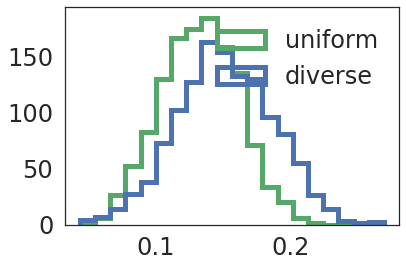

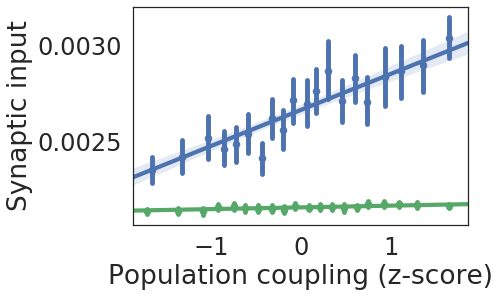

In [332]:
plt.figure()
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten()],20,label=['diverse','uniform'],normed=False,histtype='step',lw=5);
plt.legend()


f, ax = plt.subplots(figsize=(6, 4))

sns.regplot(stats.zscore(np.array(corr_pc).flatten()), y=np.array(corr_connprob).flatten(),x_bins=20)
sns.regplot(stats.zscore(np.array(uniform_pc).flatten()), y=np.array(uniform_connprob).flatten(),x_bins=20)
#ax.legend(['diverse '+r'$\alpha$','uniform '+r'$\alpha$'],loc='upper right')
ax.set_xlabel('Population coupling (z-score)')
ax.set_ylabel('Synaptic input')

## heterogenous r_0

In [346]:
#corr_pc_r_0_range_1 = np.array(corr_pc).copy()
#corr_pc_r_0_range_5 = np.array(corr_pc).copy()
#corr_pc_r_0_range_10 = np.array(corr_pc).copy()
corr_pc_r_0_range_15 = np.array(corr_pc).copy()



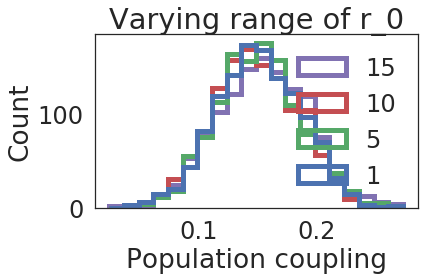

In [862]:
plt.hist([np.array(corr_pc_r_0_range_1).flatten(),np.array(corr_pc_r_0_range_5).flatten(),np.array(corr_pc_r_0_range_10).flatten(),np.array(corr_pc_r_0_range_15).flatten()],20,label=['1','5','10','15'],normed=False,histtype='step',lw=5);
plt.legend()
plt.xlabel('Population coupling')
plt.ylabel('Count')
plt.title('Varying range of r_0')
plt.tight_layout()
plt.savefig('heteregenous_r_0_range_sigmaOU_7_homog_alpha.png')


# spatial frequency  (change include_sg or include_dg)

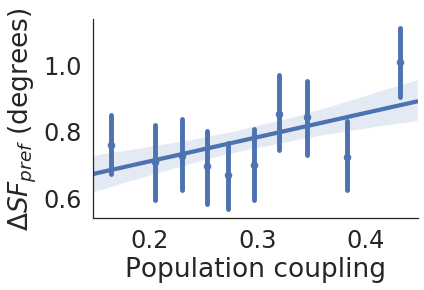

SpearmanrResult(correlation=0.054562088496287041, pvalue=0.00109288269275788)


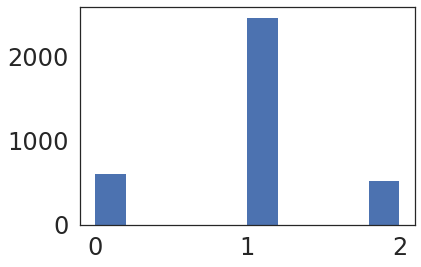

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0   -0.0305  -0.1391 0.078  False 
 0.0    2.0    0.215    0.0717 0.3584  True 
 1.0    2.0    0.2456   0.1298 0.3613  True 
--------------------------------------------


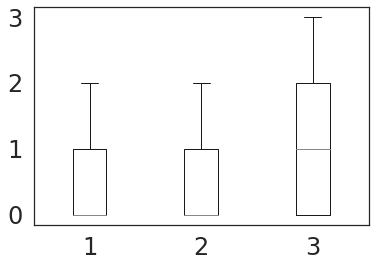

Ks_2sampResult(statistic=0.089455382189071453, pvalue=0.022101922119241054)
Ks_2sampResult(statistic=0.031055636712379764, pvalue=0.73285736930839074)
Ks_2sampResult(statistic=0.084273710052749529, pvalue=0.0044233351466894345)


In [318]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>10]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta SF_{pref}$' + ' (degrees)')
plt.tight_layout()
#plt.savefig('delta_spatial_freq_V_PC.png')
plt.show()


print scipy.stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]])


combined_sf_tf_change_arr = np.array(combined_sf_tf_change)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]

change_labels = np.ones(combined_sf_tf_change_arr.shape)


change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_sf_tf_change_arr,change_labels))


plt.boxplot([combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])


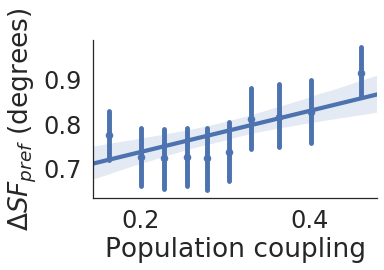

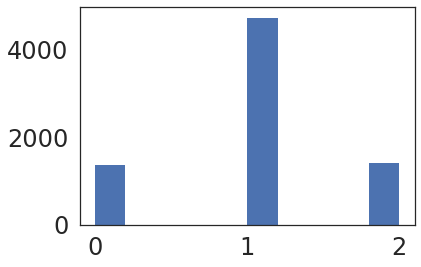

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0    0.005   -0.0613 0.0712 False 
 0.0    2.0    0.149    0.067  0.2309  True 
 1.0    2.0    0.144    0.0786 0.2094  True 
--------------------------------------------


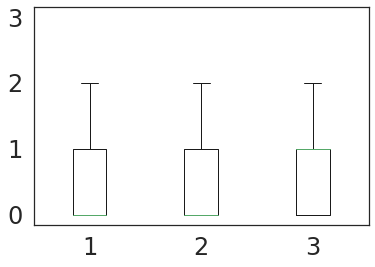

Ks_2sampResult(statistic=0.1110878841293419, pvalue=6.8678715380408771e-08)
Ks_2sampResult(statistic=0.015985096189930159, pvalue=0.94875495396688458)
Ks_2sampResult(statistic=0.095102787939411737, pvalue=5.5172402055739594e-09)


In [9]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>10]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta SF_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.show()



combined_sf_tf_change_arr = np.array(combined_sf_tf_change)[np.array(combined_reliability_before)>10]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10]

change_labels = np.ones(combined_sf_tf_change_arr.shape)


change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_sf_tf_change_arr,change_labels))


plt.boxplot([combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])


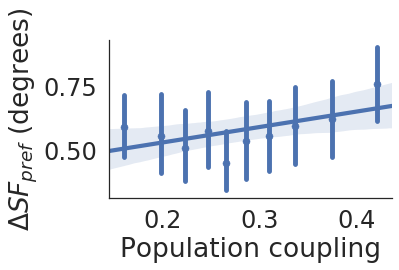

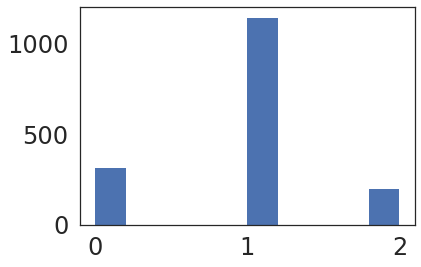

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0   -0.0563  -0.1976 0.085  False 
 0.0    2.0    0.1692  -0.0325 0.3709 False 
 1.0    2.0    0.2255   0.0545 0.3965  True 
--------------------------------------------


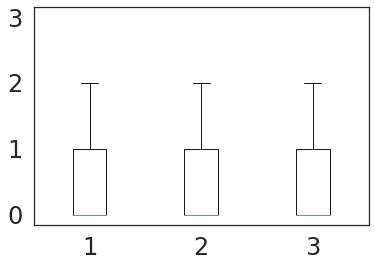

Ks_2sampResult(statistic=0.063771712158808946, pvalue=0.70120376073036883)
Ks_2sampResult(statistic=0.028186329799232968, pvalue=0.98925090378854885)
Ks_2sampResult(statistic=0.091958041958041914, pvalue=0.11291834386868353)


In [293]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>10]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta SF_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.show()

combined_sf_tf_change_arr = np.array(combined_sf_tf_change)[np.array(combined_reliability_before)>10]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10]

change_labels = np.ones(combined_sf_tf_change_arr.shape)


change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_sf_tf_change_arr,change_labels))


plt.boxplot([combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])


# temporal frequency

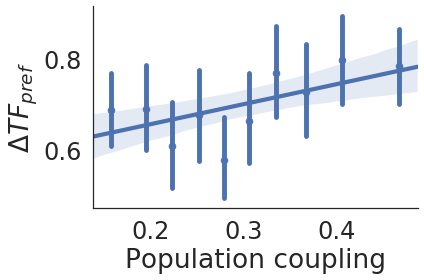

SpearmanrResult(correlation=0.058409199879251528, pvalue=0.0011502985021518224)


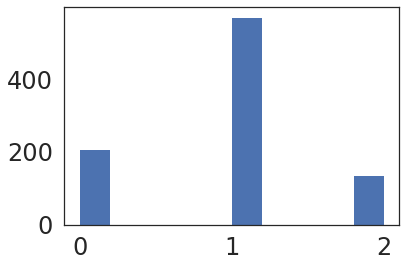

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    1.0   -0.0335  -0.1688 0.1019 False 
 0.0    2.0    0.0578  -0.1268 0.2425 False 
 1.0    2.0    0.0913  -0.0682 0.2508 False 
--------------------------------------------


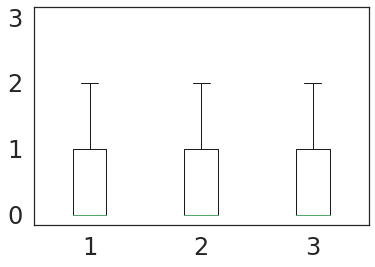

Ks_2sampResult(statistic=0.080196578085183767, pvalue=0.65664086825130463)
Ks_2sampResult(statistic=0.026016260162601612, pvalue=0.99994396075412528)
Ks_2sampResult(statistic=0.076302697041110146, pvalue=0.53645703566520697)


In [307]:
combined_reliability_after_arr = np.array(combined_reliability_after)
combined_reliability_before_arr = np.array(combined_reliability_before)

plt.figure()

sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]],x_bins=10)

#sns.regplot(np.array(combined_popcorrs_mean)[np.where((combined_reliability_after_arr>np.percentile) & (combined_reliability_before_arr>25))],np.array(combined_sf_tf_change)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))],x_bins=10)

#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta TF_{pref}$' )

plt.tight_layout()
#plt.savefig('delta_temp_freq_V_PC.png')
plt.show()

print scipy.stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)],np.array(combined_sf_tf_change)[[np.array(combined_reliability_before)>np.percentile(combined_reliability_before,50)]])


combined_sf_tf_change_arr = np.array(combined_sf_tf_change)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))]

change_labels = np.ones(combined_sf_tf_change_arr.shape)


change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_sf_tf_change_arr,change_labels))


plt.boxplot([combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_sf_tf_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])


# orientation 

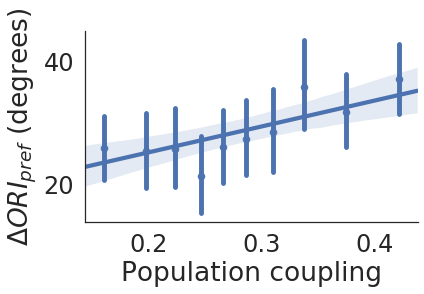

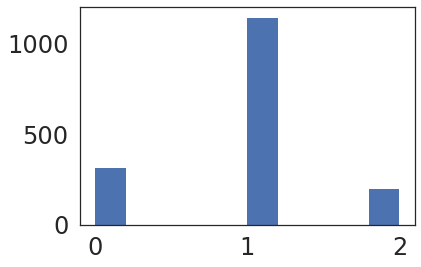

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    1.0    1.5271  -4.5566  7.6108 False 
 0.0    2.0   11.2159   2.5317   19.9   True 
 1.0    2.0    9.6888   2.3278 17.0499  True 
---------------------------------------------


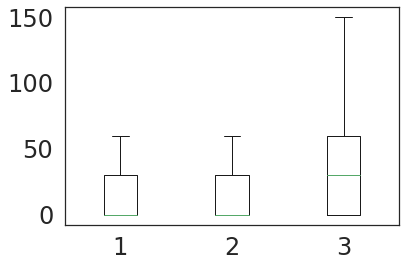

Ks_2sampResult(statistic=0.15938792390405299, pvalue=0.0039489883850409692)
Ks_2sampResult(statistic=0.02765621475298885, pvalue=0.99140347250100147)
Ks_2sampResult(statistic=0.15361305361305366, pvalue=0.00065766568236380022)


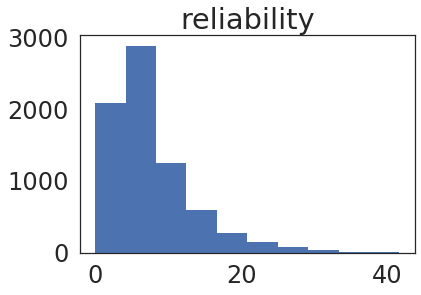

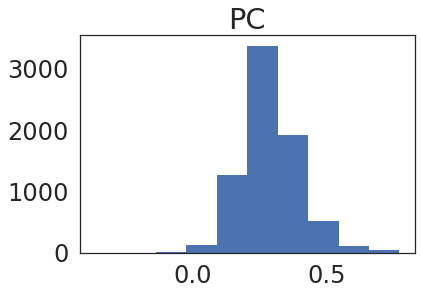

In [305]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10],np.array(combined_ori_change)[[np.array(combined_reliability_before)>10]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.show()

combined_ori_change_arr = np.array(combined_ori_change)[np.array(combined_reliability_before)>10]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>10]

change_labels = np.ones(combined_ori_change_arr.shape)

change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_ori_change_arr,change_labels))


plt.boxplot([combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])


plt.hist(combined_reliability_before)
plt.title('reliability')
plt.show()


plt.hist(combined_popcorrs_mean)
plt.title('PC')
plt.show()

# direction

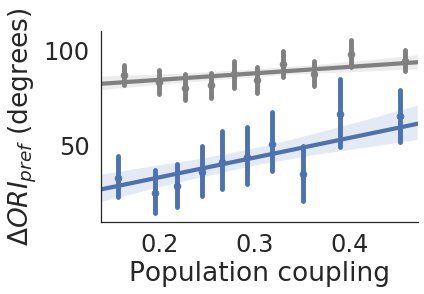

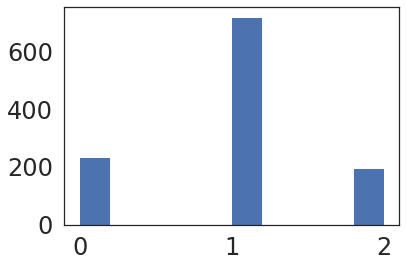

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    1.0    8.9885   -4.956 22.9331 False 
 0.0    2.0   35.6128  17.6497 53.5758  True 
 1.0    2.0   26.6242   11.702 41.5465  True 
---------------------------------------------


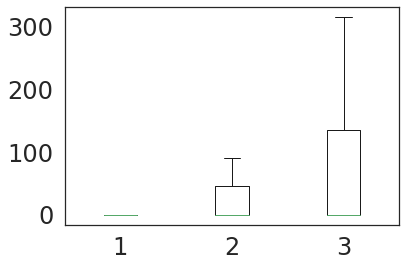

Ks_2sampResult(statistic=0.26280693849966208, pvalue=6.9787408341978575e-07)
Ks_2sampResult(statistic=0.05908677460432965, pvalue=0.56493185017896697)
Ks_2sampResult(statistic=0.20372016389533243, pvalue=5.0592512496185988e-06)


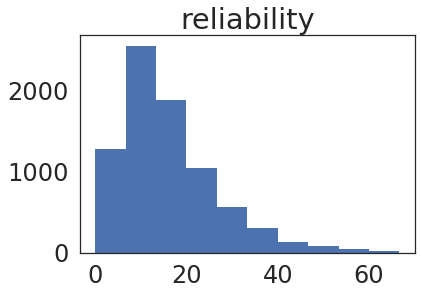

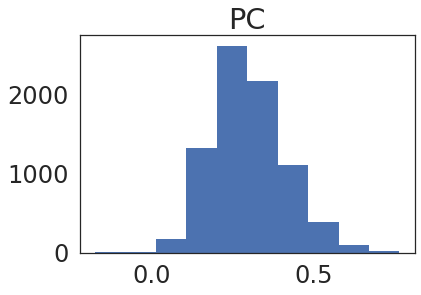

In [308]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_ori_change),x_bins=10,color='gray')

#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.show()

combined_ori_change_arr = np.array(combined_ori_change)[combined_reliability_after_arr>25]
combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[combined_reliability_after_arr>25]
#combined_ori_change_arr = np.array(combined_ori_change)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))]
#combined_popcorrs_mean_arr = np.array(combined_popcorrs_mean)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))]

change_labels = np.ones(combined_ori_change_arr.shape)

change_labels[(combined_popcorrs_mean_arr<0.2)] = 0
change_labels[(combined_popcorrs_mean_arr>0.4)] = 2
plt.hist(change_labels)
plt.show()

print(pairwise_tukeyhsd(combined_ori_change_arr,change_labels))


plt.boxplot([combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))] ])
plt.show()

print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr<0.2))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])
print scipy.stats.ks_2samp(combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.4))],combined_ori_change_arr[np.where((combined_popcorrs_mean_arr>0.2) & (combined_popcorrs_mean_arr<0.4))])

plt.hist(combined_reliability_after)
plt.title('reliability')
plt.show()


plt.hist(combined_popcorrs_mean)
plt.title('PC')
plt.show()

## reliable orientation and direction in one plot

In [212]:
popcorrs_mean_ori = np.array(combined_popcorrs_mean).copy()
ori_change = np.array(combined_ori_change).copy()
reliability_before_ori = np.array(combined_reliability_before).copy()

#popcorrs_mean_dir = np.array(combined_popcorrs_mean).copy()
#dir_change = np.array(combined_ori_change).copy()
#reliability_before_dir = np.array(combined_reliability_before).copy()


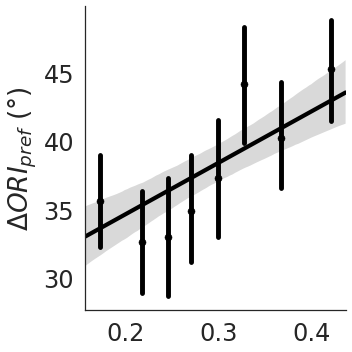

SpearmanrResult(correlation=0.035556734102988062, pvalue=0.0029047983907318255)
SpearmanrResult(correlation=0.12460955603931005, pvalue=3.4834086195145344e-12)


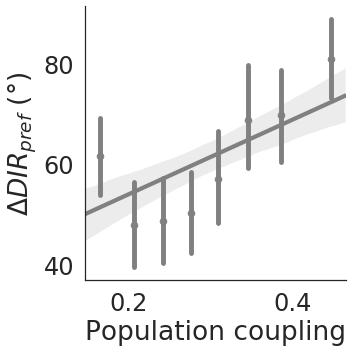

In [275]:
sns.set_color_codes("dark")

plt.figure(figsize=(5,5))
#sns.regplot(np.array(popcorrs_mean_dir),np.array(dir_change),x_bins=8,color='gray')

sns.regplot(np.array(popcorrs_mean_ori)[np.array(reliability_before_ori)>np.percentile(reliability_before_ori,50)],np.array(ori_change)[[np.array(reliability_before_ori)>np.percentile(reliability_before_ori,50)]],x_bins=8,color='black')

#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
#plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref }$' + ' ' +r'$(\degree)$')
plt.tight_layout()
#plt.savefig('reliable_popcorr_ori_vertical_column_reliability_50pc.png')

plt.show()

print stats.spearmanr(np.array(popcorrs_mean_ori)[np.array(reliability_before_ori)>np.percentile(reliability_before_ori,0)],np.array(ori_change)[[np.array(reliability_before_ori)>np.percentile(reliability_before_ori,0)]])

plt.figure(figsize=(5,5))

#sns.regplot(np.array(popcorrs_mean_dir)[np.array(reliability_before_dir)>25],np.array(dir_change)[[np.array(reliability_before_dir)>25]],x_bins=8)
sns.regplot(np.array(popcorrs_mean_dir)[np.array(reliability_before_dir)>np.percentile(reliability_before_dir,50)],np.array(dir_change)[[np.array(reliability_before_dir)>np.percentile(reliability_before_dir,50)]],x_bins=8,color='gray')
#sns.regplot(np.array(popcorrs_mean_dir),np.array(dir_change),x_bins=8,color='black')

print stats.spearmanr(np.array(popcorrs_mean_dir)[np.array(reliability_before_dir)>np.percentile(reliability_before_dir,50)],np.array(dir_change)[[np.array(reliability_before_dir)>np.percentile(reliability_before_dir,50)]])


#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>35],np.array(combined_ori_change)[[np.array(combined_reliability_before)>35]],x_bins=10,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta DIR_{pref}$' + ' ' +r'$(\degree)$')
plt.tight_layout()
#plt.savefig('reliable_popcorr_dir_vertical_column_reliability_50pc.png')
plt.show()

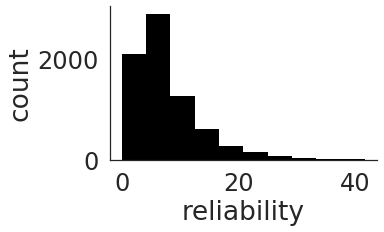

8.33333333333


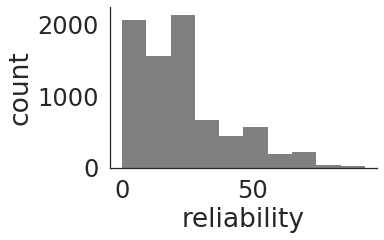

8.33333333333


In [158]:
plt.hist(reliability_before_ori,color='black')
sns.despine()
#plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel('reliability')
plt.ylabel('count')
plt.tight_layout()
#plt.savefig('reliability_distribution_ori.pdf')

plt.show()
print np.percentile(reliability_before_ori,75) 

plt.hist(reliability_before_dir,color='gray')
sns.despine()
#plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel('reliability')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('reliability_distribution_dir.pdf')

plt.show()
print np.percentile(reliability_before_ori,75) 

# reliability after is more informative for plasticity/coupling 

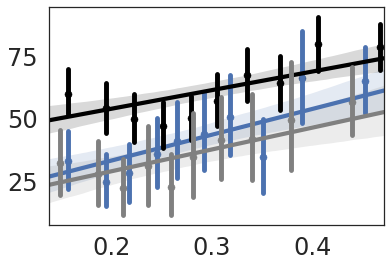

In [366]:
combined_reliability_after_arr = np.array(combined_reliability_after)
combined_reliability_before_arr = np.array(combined_reliability_before)

plt.figure()
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>25],np.array(combined_ori_change)[[np.array(combined_reliability_before)>25]],x_bins=10,color='black')
sns.regplot(np.array(combined_popcorrs_mean)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))],np.array(combined_ori_change)[np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25))],x_bins=10,color='gray')


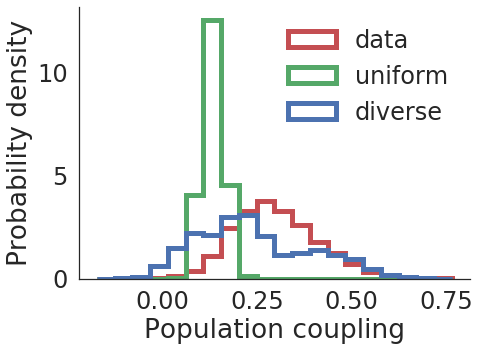

In [179]:
plt.figure(figsize=(7,5))
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten(),np.array(combined_popcorrs_mean)],20,label=['diverse','uniform','data'],normed=True,histtype='step',lw=5);
plt.legend(loc='upper right')
plt.xlabel('Population coupling')
plt.ylabel('Probability density')
sns.despine()
plt.savefig('population_coupling_dist_alpha_range_150_ext_OU_sigma_7.pdf')
plt.show()


# alpha_range = 175 , OU_ext = 9.0

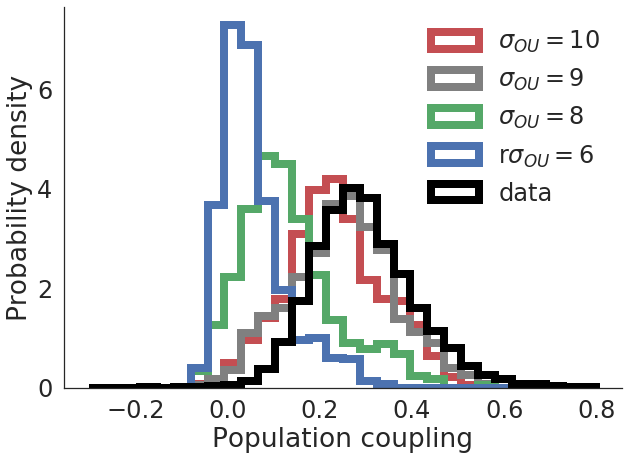

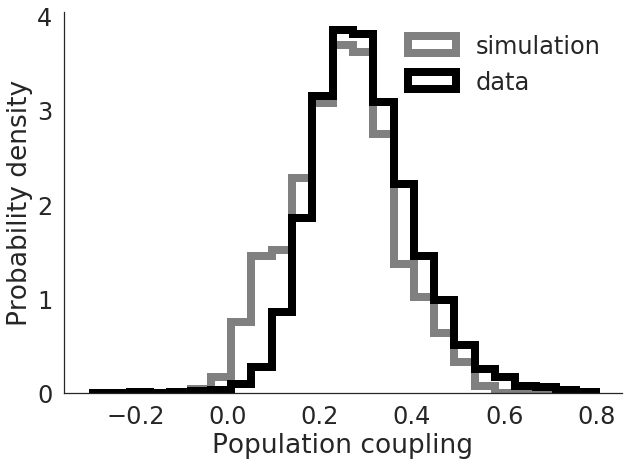

In [1048]:
#plt.figure()
#plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten(),np.array(combined_popcorrs_mean)],20,label=['diverse','uniform','data'],normed=True,histtype='step',lw=5);
#plt.xlabel('Population coupling')
#plt.ylabel('Probabiility density')
#plt.legend()

plt.figure(figsize=(10,7))
#plt.hist([np.array(combined_popcorrs_mean).flatten(),combined_popcorrs_mean_alpha_range_175_OU_6.flatten(),combined_popcorrs_mean_alpha_range_175_OU_7.flatten(),combined_popcorrs_mean_alpha_range_175_OU_8.flatten(),combined_popcorrs_mean_alpha_range_175_OU_9.flatten(),combined_popcorrs_mean_alpha_range_175_OU_10.flatten()],30,label=['data','OU_6','OU_7','OU_8','OU_9','OU_10'],color=['black','b','r','g','gray','y'],normed=True,histtype='step',alpha=1.0,lw=8,range=(-0.3,0.8));
plt.hist([np.array(combined_popcorrs_mean).flatten(),combined_popcorrs_mean_alpha_range_175_OU_6.flatten(),combined_popcorrs_mean_alpha_range_175_OU_8.flatten(),combined_popcorrs_mean_alpha_range_175_OU_9.flatten(),combined_popcorrs_mean_alpha_range_175_OU_10.flatten()],30,label=['data','r$\sigma_{OU}=6$',r'$\sigma_{OU}=8$',r'$\sigma_{OU}=9$',r'$\sigma_{OU}=10$'],color=['black','b','g','gray','r'],normed=True,histtype='step',alpha=1.0,lw=8,range=(-0.3,0.8));
plt.legend(loc='upper right')
plt.xlabel('Population coupling')
plt.ylabel('Probability density')
sns.despine()
#plt.savefig('population_coupling_dist_alpha_range_175_ext_OU_sigma_range.pdf')

plt.figure(figsize=(10,7))
#plt.hist([np.array(combined_popcorrs_mean).flatten(),combined_popcorrs_mean_alpha_range_175_OU_6.flatten(),combined_popcorrs_mean_alpha_range_175_OU_7.flatten(),combined_popcorrs_mean_alpha_range_175_OU_8.flatten(),combined_popcorrs_mean_alpha_range_175_OU_9.flatten(),combined_popcorrs_mean_alpha_range_175_OU_10.flatten()],30,label=['data','OU_6','OU_7','OU_8','OU_9','OU_10'],color=['black','b','r','g','gray','y'],normed=True,histtype='step',alpha=1.0,lw=8,range=(-0.3,0.8));
plt.hist([np.array(combined_popcorrs_mean),combined_popcorrs_mean_alpha_range_175_OU_9.flatten()],25,label=['data','simulation'],color=['black','gray'],normed=True,histtype='step',alpha=1.0,lw=8,range=(-0.3,0.8));
plt.legend(loc='upper right')
plt.xlabel('Population coupling')
plt.ylabel('Probability density')
sns.despine()
plt.savefig('population_coupling_data_alpha_range_175_ext_sigma_9.ps')


#from sklearn import metrics
#metrics.mutual_info_score(np.array(combined_popcorrs_mean).flatten(),combined_popcorrs_mean_alpha_range_175_OU_6.flatten(), contingency=None)

#plt.savefig('population_coupling_dist_alpha_range_150_ext_OU_sigma_6.ps')

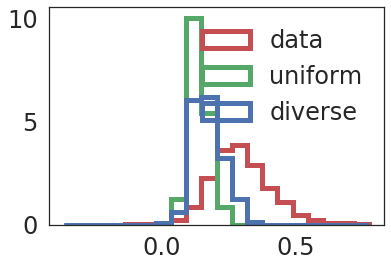

In [1329]:
plt.figure()
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten(),np.array(combined_popcorrs_mean)],20,label=['diverse','uniform','data'],normed=True,histtype='step',lw=5);
plt.legend()

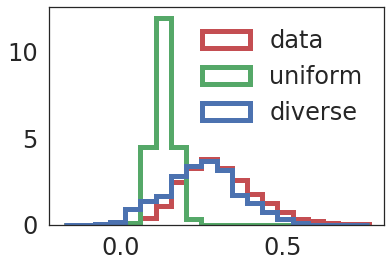

In [441]:
plt.figure()
plt.hist([np.array(corr_pc).flatten(),np.array(uniform_pc).flatten(),np.array(combined_popcorrs_mean)],20,label=['diverse','uniform','data'],normed=True,histtype='step',lw=5);
plt.legend()
plt.savefig('time_scale_alpha.png')

In [360]:
np.shape(np.where((combined_reliability_after_arr>25) & (combined_reliability_before_arr>25)))

(1, 909)

# ABI response distribution analysis

 rate Vs PC  (0.010208825440756564, 0.36411736254945903)
rate V dDIR  (-0.0016290157321671229, 0.88485844716992845)
dDIR Vs varRate SpearmanrResult(correlation=0.037449292274432062, pvalue=0.0023022788225472079)
PC _ dDIR (0.073624846737211189, 1.9886058408186643e-09)
peakdFF, dDIR  SpearmanrResult(correlation=-0.26562123103082252, pvalue=2.3520290443183382e-107)
PC V dDORI , nonconfound peak DFF SpearmanrResult(correlation=0.18119077537141834, pvalue=7.1802220749962221e-10)
partial correlation SpearmanrResult(correlation=0.066876717964136398, pvalue=0.0239413564579469)
DSI V dDORI SpearmanrResult(correlation=nan, pvalue=nan)
DSI V dDORI (nan, 1.0)


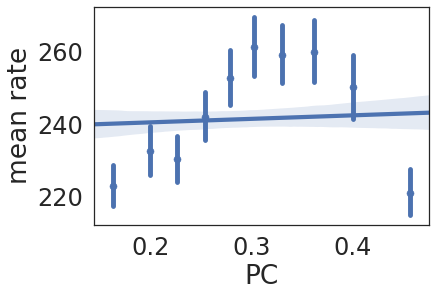

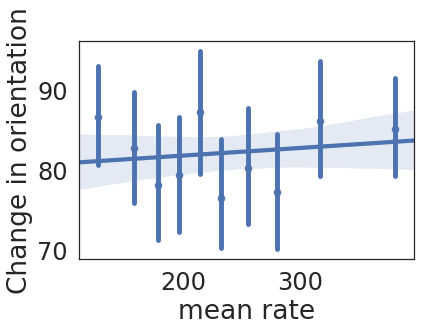

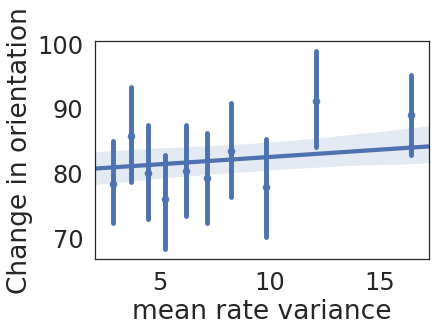

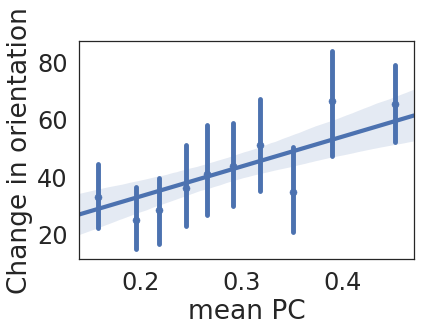

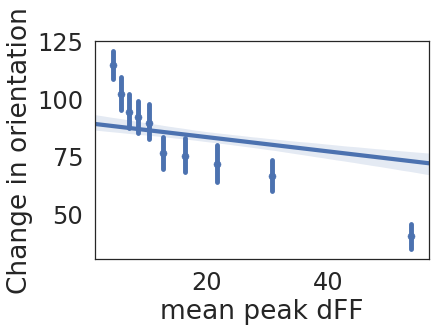

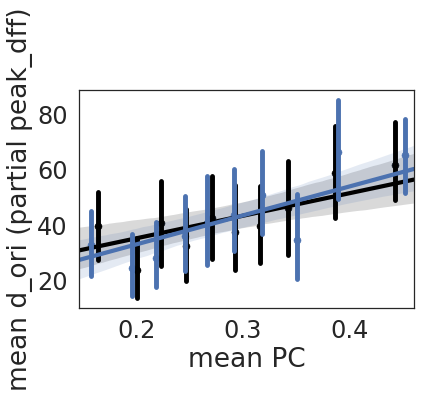

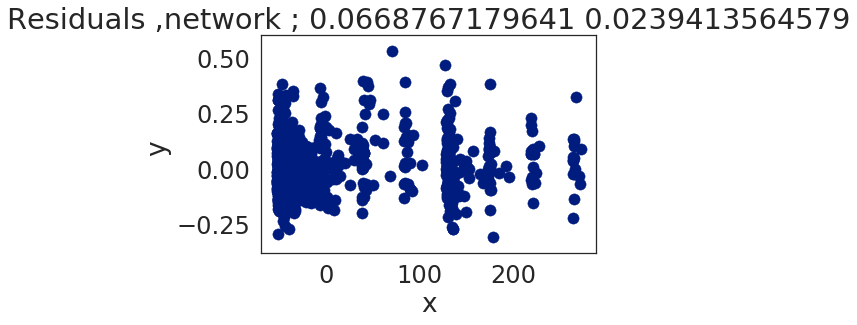

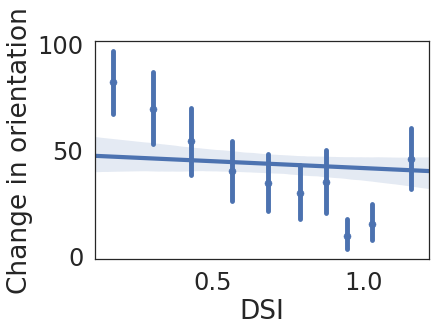

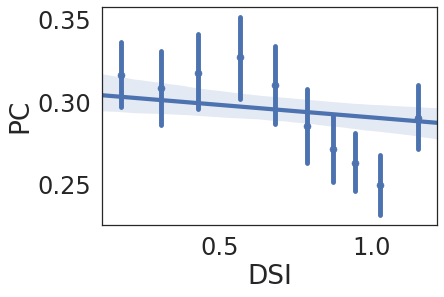

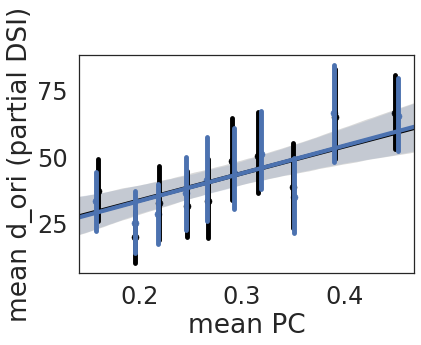

In [302]:
sns.regplot(np.array(combined_popcorrs_mean),np.array(combined_rates_mean),x_bins=10)
plt.xlabel('PC')
plt.ylabel('mean rate')
print 'rate Vs PC ', stats.pearsonr(np.array(combined_popcorrs_mean),np.array(combined_rates_mean))

plt.figure()
sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('mean rate')
plt.ylabel('Change in orientation')
plt.savefig('Rate_vs_dDIR.png')
print 'rate V dDIR ', stats.pearsonr(np.array(combined_rates_mean),np.array(combined_ori_change))

plt.figure()
sns.regplot(np.array(combined_rates_std)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]],x_bins=10)
#sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('mean rate variance')
plt.ylabel('Change in orientation')
plt.savefig('varRate_vs_dDIR.png')

print 'dDIR Vs varRate' , stats.spearmanr(np.array(combined_rates_std)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]])

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('mean PC')
plt.ylabel('Change in orientation')
print 'PC _ dDIR', stats.pearsonr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]])

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_peak_sf)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]],x_bins=10)
plt.xlabel('mean peak dFF')
plt.ylabel('Change in orientation')
print 'peakdFF, dDIR ', stats.spearmanr(np.array(combined_peak_sf)[np.array(combined_reliability_after)>0],np.array(combined_ori_change)[[np.array(combined_reliability_after)>0]])
plt.savefig('peakdFF_dDIR.png')

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_partial=np.array(combined_peak_sf)[[np.array(combined_reliability_after)>25]],x_bins=10,color='black')
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.ylabel('mean d_ori (partial peak_dff)')
plt.xlabel('mean PC')
print 'PC V dDORI , nonconfound peak DFF' , stats.spearmanr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]])
plt.savefig('PC_V_dDIR_confound_peak_dff.png')
partial_corr(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],np.array(combined_peak_sf)[[np.array(combined_reliability_after)>25]])

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_dsi)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('DSI')
plt.ylabel('Change in orientation')
plt.savefig('DSI_V_dDIR.png')
print 'DSI V dDORI' , stats.spearmanr(np.array(combined_dsi)[np.array(combined_reliability_after)>10],np.array(combined_ori_change)[[np.array(combined_reliability_after)>10]])
print 'DSI V dDORI' , stats.pearsonr(np.array(combined_dsi),np.array(combined_ori_change))
           
plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_dsi)[np.array(combined_reliability_after)>25],np.array(combined_popcorrs_mean)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('DSI')
plt.ylabel('PC')
plt.savefig('PC_V_DSI.png')

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_partial=np.array(combined_dsi)[[np.array(combined_reliability_after)>25]],x_bins=10,color='black')
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.ylabel('mean d_ori (partial DSI)')
plt.xlabel('mean PC')
plt.savefig('PC_V_dDIR_confound_DSI.png')



# response size relation to selectivity and stability

Text(0.5,0,u'mean PC')

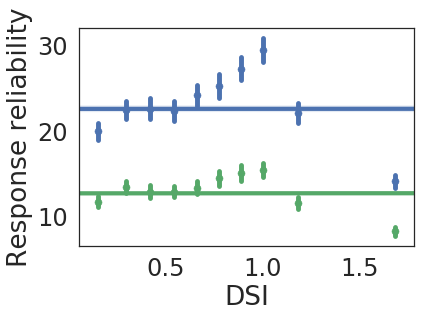

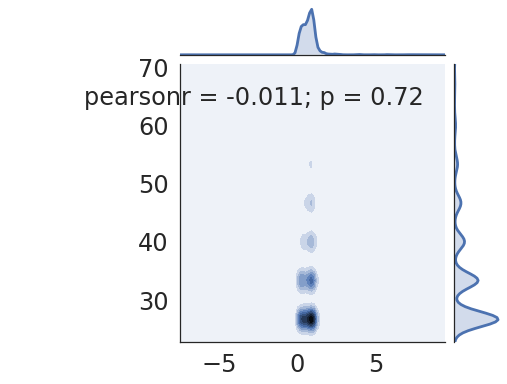

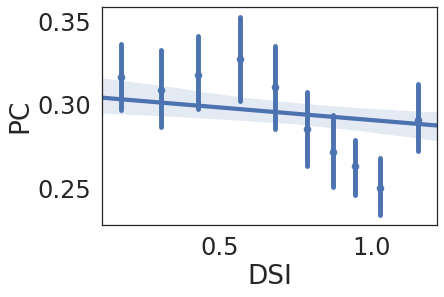

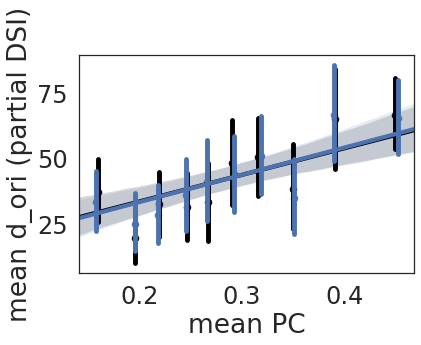

In [438]:
plt.figure()
sns.regplot(np.array(combined_dsi),np.array(combined_reliability_before),x_bins=10)
sns.regplot(np.array(combined_dsi),np.array(combined_reliability_after),x_bins=10)
plt.xlabel('DSI')
plt.ylabel('Response reliability')

plt.figure()
sns.jointplot(np.array(combined_dsi)[np.array(combined_reliability_after)>25],np.array(combined_reliability_after)[np.array(combined_reliability_after)>25],kind='kde')

           
plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_dsi)[np.array(combined_reliability_after)>25],np.array(combined_popcorrs_mean)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.xlabel('DSI')
plt.ylabel('PC')

plt.figure()
#sns.regplot(np.array(combined_rates_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_partial=np.array(combined_dsi)[[np.array(combined_reliability_after)>25]],x_bins=10,color='black')
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_after)>25],np.array(combined_ori_change)[[np.array(combined_reliability_after)>25]],x_bins=10)
plt.ylabel('mean d_ori (partial DSI)')
plt.xlabel('mean PC')

# response reliability static gratings

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'xlabel', 'ylabel'
  s)


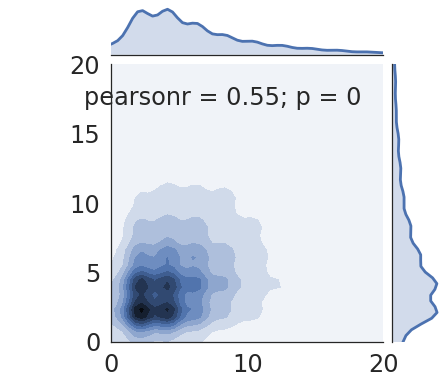

In [462]:
sns.jointplot(np.array(combined_reliability_before),np.array(combined_reliability_after),kind='kde',xlabel='before',ylabel='after',xlim=(0,20),ylim=(0,20))

plt.savefig('response_reliability_static.png')

# reponse reliability drifting gratings

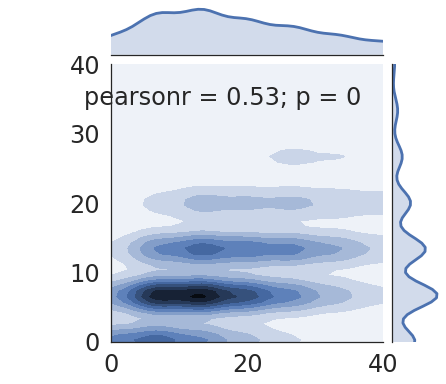

In [465]:
sns.jointplot(np.array(combined_reliability_before),np.array(combined_reliability_after),kind='kde',xlabel='before',ylabel='after',xlim=(0,40),ylim=(0,40))

plt.savefig('response_reliability_drifting.png')

## ABI analysis, filtering by reliability

In [317]:
#### import glob
#ABI_results = glob.glob('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/*preserved_pc.pkl')
import os
import pandas as pd

data_files = os.listdir('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/boc/ophys_experiment_data/')

data_sets = []
for data_file in data_files:
    data_sets.append(int(data_file.partition('.')[0]))

diff_ori_dg = []
diff_tf_dg = []
mean_popcorr_diff_ori_dg_diff = []

diff_ori_sg = []
diff_sf_sg = []
mean_popcorr_diff_ori_sg_diff = []


combined_popcorr_diff_ori = []
combined_popcorr_nodiff_ori = []

combined_popcorr_diff_tf = []
combined_popcorr_nodiff_tf = []
combined_popcorr_diff_sf = []
combined_popcorr_nodiff_sf = []

combined_popcorr_diff_vis= []
combined_popcorr_nodiff_vis = []

combined_popcorrs_mean = []
combined_popcorrs_std = []
combined_ori_change = []
combined_sf_tf_change = []
combined_rates_mean = []
combined_rates_std = []
combined_peak_sf = []
combined_ori_before = []
combined_ori_after = []

combined_osi = []
combined_dsi = []
combined_vis = []

combined_reliability_before = []
combined_reliability_after = []

combined_events_before = []
combined_events_after = []

data_sets[10]

ttest_stats = []
ttest_stats_rates = []
ttest_pval = []
# 503109347 a clear example for cumulative hist difference

counter = 0
N_250_idcs = [] 
N_50_idcs = []

Ncells_exp = []

PC_thresh = 0.3

include_dg = False
include_sg = True

potential_datasets = []
using_datasets = []


for data_set in data_sets:
    try:
        res = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_preserved_pc.pkl')    
        popcorr_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_pc_bins.pkl')  
        rates_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_rates_bins.pkl')    
        print 'loading'
        potential_datasets.append(str(data_set))
    except:
        print 'no analysis for dataset ', data_set
        continue
        
    if res.has_key('ori_dg') and len(res['ori_dg'][0])>50 and include_dg:
        using_datasets.append(str(data_set))
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        reliability_before_25pc = np.percentile(res['response_reliability_dg'][0],50) 
        #reliability_before_25pc = 0
        
        Ncells_exp.append(len(res['ori_dg'][0]))
        #if res.has_key('ori_dg') and len(res['ori_dg'][0])>250:
        N_250_idcs.append(counter)
        #else:
        #N_50_idcs.append(counter)
            
        counter +=1 

        #diff_ori_dg = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])>0
        #nodiff_ori_dg = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])<1
        diff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])<1
       
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        
        combined_popcorr_nodiff_ori = np.mean(popcorr_bins_results,axis=1)[((nodiff_ori_dg>0) & (res['response_reliability_dg'][0]>reliability_before_25pc))]
        combined_popcorr_diff_ori = np.mean(popcorr_bins_results,axis=1)[((diff_ori_dg>0) & (res['response_reliability_dg'][0]>reliability_before_25pc))]
        

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(45.0*np.abs(res['ori_dg'][0] - res['ori_dg'][1]))
        combined_ori_before.extend(res['ori_dg'][0])
        combined_ori_after.extend(res['ori_dg'][1])
        combined_sf_tf_change.extend(np.abs(res['tf_dg'][0] - res['tf_dg'][1]))
        combined_peak_sf.extend((res['peak_dff_dg'][0] + res['peak_dff_dg'][1]))

        #combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_tf_dg>0)]))
        #combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(res['osi_dg'][0]))
        combined_dsi.extend(list(res['dsi_dg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_dg'][0])
        combined_reliability_after.extend(res['response_reliability_dg'][1])
        
        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
    
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc][np.where(diff_ori_dg>0)]))/np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc][np.where(nodiff_ori_dg>0)])))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        #ttest_stats_rates.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_dg'][0] - res['ori_dg'][1]))

        
    if res.has_key('ori_sg') and len(res['ori_sg'][0])>50 and include_sg:
        using_datasets.append(str(data_set))
        print 'sg'
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        Ncells_exp.append(len(res['ori_sg'][0]))
        #if res.has_key('ori_sg') and len(res['ori_sg'][0])>250:
        #N_250_idcs.append(counter)
        #else:
        N_50_idcs.append(counter)
        counter +=1 
        
        reliability_before_25pc = np.percentile(res['response_reliability_sg'][0],50) 
        #reliability_before_25pc = 0

        diff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])>0
        nodiff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])<1
        
        diff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])>0
        nodiff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        
        combined_popcorr_nodiff_ori = np.mean(popcorr_bins_results,axis=1)[((nodiff_ori_sg>0) & (res['response_reliability_sg'][0]>reliability_before_25pc))]
        combined_popcorr_diff_ori = np.mean(popcorr_bins_results,axis=1)[((diff_ori_sg>0) & (res['response_reliability_sg'][0]>reliability_before_25pc))]
  
        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(30.0*np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        combined_ori_before.extend(res['ori_sg'][0])
        combined_ori_after.extend(res['ori_sg'][1])
        combined_sf_tf_change.extend(np.abs(res['sf_sg'][0] - res['sf_sg'][1]))
        combined_peak_sf.extend((res['peak_dff_sg'][0] + res['peak_dff_sg'][1]))

        combined_popcorr_diff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_sf_sg>0)]))
        combined_popcorr_nodiff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_sf_sg>0)]))
        
        combined_osi.extend(list(res['osi_sg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_sg'][0])
        combined_reliability_after.extend(res['response_reliability_sg'][1])

        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_sf))
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))

        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        

loading
sg
(-0.072622533897145555, 0.27062080016407963)
loading
sg
(-0.028606440932285135, 0.60404957352111055)
no analysis for dataset  530645663
no analysis for dataset  512326618
loading
no analysis for dataset  501704220
no analysis for dataset  501836392
loading
loading
sg
(0.036796785023861488, 0.52689319332879425)
no analysis for dataset  501886692
loading
loading
sg
(-0.019399883747404218, 0.85436630795425894)
loading
loading
loading
sg
(-0.044720823774552713, 0.56724068702278252)
no analysis for dataset  526928092
no analysis for dataset  530773844
no analysis for dataset  509962140
no analysis for dataset  529693740
loading
sg
(0.07698432872082242, 0.34263279887904852)
no analysis for dataset  512311673
no analysis for dataset  510221121
loading
sg
(-0.02670024243250653, 0.71533717674622865)
loading
loading
sg
(-0.020437969846790222, 0.84666608250076236)
no analysis for dataset  501876401
no analysis for dataset  528480613
loading
sg
(0.046006302298556644, 0.50423409805407582

In [543]:
combined_popcorrs_mean_alpha_range_175_OU_10 = np.array(corr_pc).copy()

In [487]:
with open('ABI_datasets_used.txt', 'w') as f:
    for item in using_datasets:
        print >> f, item

1.05047490885
Ttest_1sampResult(statistic=4.8973527538226866, pvalue=7.0971788823284834e-06)


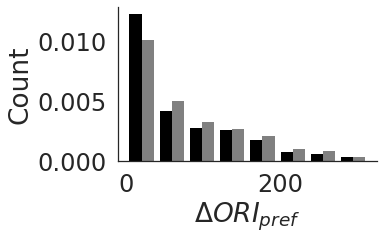

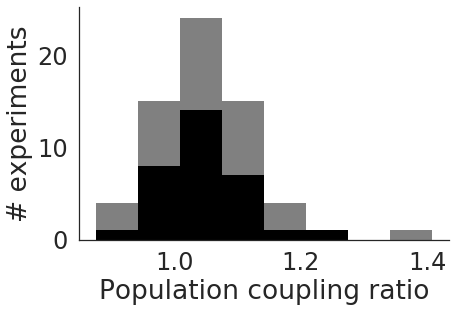

In [921]:
plt.hist([np.array(combined_ori_change)[np.array(combined_popcorrs_mean)<0.4],np.array(combined_ori_change)[np.array(combined_popcorrs_mean)>0.4]],8,color=['black','gray'],stacked=False,normed=True)
plt.ylabel('Count')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.xlabel(r'$\Delta ORI_{pref}$')
sns.despine()
plt.tight_layout()
#plt.savefig('manuscript/figures/Delta_ORIpref.png')

f, ax = plt.subplots(figsize=(7, 5))

sns.set_color_codes("deep")
sns.set(style="white",context='poster',font_scale=1.5)

ax.hist([np.array(ttest_stats)[N_50_idcs],np.array(ttest_stats)[N_250_idcs]],color=['black','gray'],histtype='barstacked',bins=8)
ax.set_ylabel('# experiments')
#ax.set_xlabel(r'$\Delta ORI_{pref}^ {high PC} - \Delta ORI_{pref}^{low PC}$')
ax.set_xlabel('Population coupling ratio')

sns.despine(left=False, bottom=False)

#ax.legend(['static gratings', 'drifting gratings'],loc='upper left',fontsize=22)
#ax.legend(['*', 'n.s.'],loc='upper left')
plt.tight_layout()
plt.savefig('Population_coupling_ratio_reliability_50pc.ps')

print np.mean(ttest_stats)
print stats.ttest_1samp(ttest_stats,1.0)

In [635]:
ori_change_sg = np.array(combined_ori_change).copy()

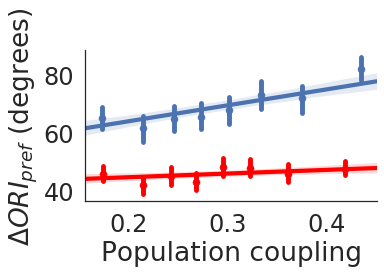

In [100]:
plt.figure()
sns.regplot(np.array(combined_popcorrs_means_reliable_25pc),np.array(combined_ori_change_reliable_25pc),x_bins=8)
sns.regplot(np.array(combined_popcorrs_mean)[np.array(combined_reliability_before)>0],np.array(combined_ori_change)[[np.array(combined_reliability_before)>0]],x_bins=8,order=1,color='red',logistic=False)
sns.despine()
plt.xlabel('Population coupling')
#plt.xticks([0.0,0.2,0.4,0.6])
plt.ylabel(r'$\Delta ORI_{pref}$' + ' (degrees)')
plt.tight_layout()
plt.show()

In [716]:
print combined_popcorr_nodiff_ori.shape
print res['response_reliability_dg'][0].shape
combined_popcorr_diff_ori_reliable = combined_popcorr_diff_ori[res['response_reliability_dg'][0]>reliability_before_25pc]


(95,)
(270,)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 175 but corresponding boolean dimension is 270

In [851]:
combined_popcorr_nodiff_ori = np.mean(popcorr_bins_results,axis=1)[((nodiff_ori_sg>0) & res['response_reliability_sg'][0]>reliability_before_25pc)]
print combined_popcorr_nodiff_ori

[]


In [852]:
reliability_before_25pc = np.percentile(res['response_reliability_sg'][0],25) 
print reliability_before_25pc

2.08333333333


In [863]:
sum((diff_ori_sg>0)&res['response_reliability_sg'][0]>reliability_before_25pc)

0

In [880]:
sum((nodiff_ori_sg>0) & (res['response_reliability_sg'][0]>reliability_before_25pc))

17

In [940]:
from scipy import stats

uniform_connprob = []
corr_connprob = []
corr_pc = []
uniform_pc = []
uniform_W = []
corr_W = []

uniform_selectivity_fluct = []
corr_selectivity_fluct = []
uniform_selectivity = []
corr_selectivity = []

selectivity_change_thresh = 0.01


RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/181/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_3_OU_5_pc_measure_struct_10sims',15,False)
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/mnt/DATA/ysweeney/data/topdown_learning/RF_net_runs/116/RF_net_N_100_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.0',10,False)
#    
#RF_results = launch_RF_net_multiproc.consolidate_distrib_results('/home/ysweeney/CNL-brain3/data/topdown_learning/RF_net_runs/190/RF_net_N_250_target_p5_Wmax_2_alpha_uniform_40_homogbase_5_scaling_p5_eta_2_sweepOU_pc_measure_struct_5sims_eta1_base2e-08ext_OU_sigma4.5',15,False)
    
for net_idx in xrange(len(RF_results)):
    for sim_idx in xrange(1):
        uniform_connprob.append(np.mean(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'],axis=0))
        uniform_pc.append(RF_results[net_idx]['selectivities_results_uniform'][sim_idx]['empirical_pop_coupling'])
        uniform_selectivity.append(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][-1])
        uniform_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_uniform'][sim_idx][5:],axis=0))
        uniform_W.append(RF_results[net_idx]['simresults_uniform'][sim_idx]['W_plastic'].flatten())
    #if RF_results[net_idx]['selectivities_results_corr'][0]['pop_coupling_partial_rval']>0.3:
        corr_connprob.append(np.mean(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'],axis=0))
        corr_pc.append(RF_results[net_idx]['selectivities_results_corr'][sim_idx]['empirical_pop_coupling'])
        corr_selectivity.append(RF_results[net_idx]['selectivities_t_corr'][sim_idx][-1])
        corr_selectivity_fluct.append(np.std(RF_results[net_idx]['selectivities_t_corr'][sim_idx][5:],axis=0))
        corr_W.append(RF_results[net_idx]['simresults_corr'][sim_idx]['W_plastic'].flatten())

        print 'diverse link', stats.pearsonr(corr_pc[-1],corr_connprob[-1])
        print 'uniform link', stats.pearsonr(uniform_pc[-1],uniform_connprob[-1])
        print 'diverse width', np.std(corr_pc[-1])
        print 'uniform width', np.std(uniform_pc[-1])

plt.figure()
plt.hist([corr_connprob,uniform_connprob],10,normed=True);
plt.legend(['diverse','uniform'])

plt.figure()
plt.hist([corr_pc,uniform_pc],10,normed=True);
plt.legend(['diverse','uniform'])
print 'diverse, uniform width ', np.std(corr_pc)/np.std(uniform_pc)
print 'diverse, uniform range ', (np.max(corr_pc)-np.min(corr_pc))/(np.max(uniform_pc)-np.min(uniform_pc))
print 'diverse, uniform quartile ', (np.percentile(corr_pc,75)-np.percentile(corr_pc,25))/(np.percentile(uniform_pc,75)-np.percentile(uniform_pc,25))

sns.jointplot(np.array(corr_connprob).flatten(),np.array(corr_pc).flatten(),xlim=(0.004,0.018))
sns.jointplot(np.array(uniform_connprob).flatten(),np.array(uniform_pc).flatten(),xlim=(0.004,0.018))

sns.jointplot(np.array(corr_pc).flatten(),np.array(corr_selectivity_fluct).flatten())
sns.jointplot(np.array(uniform_pc).flatten(),np.array(uniform_selectivity_fluct).flatten())


#print 'high unif ' ,np.mean(np.array(uniform_pc[uniform_connprob>0.2]))
#print 'low unif ' ,np.mean(np.array(uniform_pc[uniform_connprob<0.2]))

#print 'high diverse ' ,np.mean(np.array(corr_pc[corr_connprob>0.2]))
#print 'low diverse' ,np.mean(np.array(corr_pc[corr_connprob<0.2]))

plt.figure()
digit = np.digitize(np.array(uniform_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(uniform_connprob).flatten()[digit==i]) for i in xrange(40)])
digit = np.digitize(np.array(corr_pc).flatten(),np.arange(-1.0,1.0,0.05))
plt.plot([np.mean(np.array(corr_connprob).flatten()[digit==i]) for i in xrange(40)])

plt.legend(['uniform','diverse'])

KeyError: 'networks'

In [1084]:



plt.figure()
plt.scatter(res['networks'][0].pop_coupling,np.std(res['selectivities_t_uniform'][0][5:],axis=0))
plt.scatter(res['networks'][0].pop_coupling,np.std(res['selectivities_t_corr'][0][5:],axis=0))
plt.legend(['uniform','corr'])
plt.ylabel('selectivity fluctuations')
plt.xlabel('alpha')






KeyError: 'networks'

(array([  21.,  178.,  421.,  303.,  164.,   74.,   45.,   24.,   12.,    8.]),
 array([-0.10104645, -0.05094744, -0.00084844,  0.04925056,  0.09934956,
         0.14944856,  0.19954756,  0.24964656,  0.29974556,  0.34984456,
         0.39994356]),
 <a list of 10 Patch objects>)

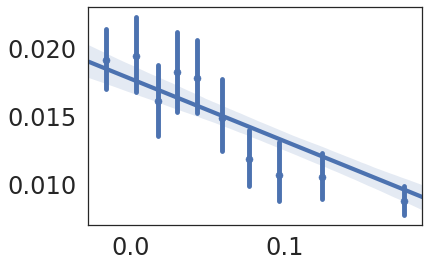

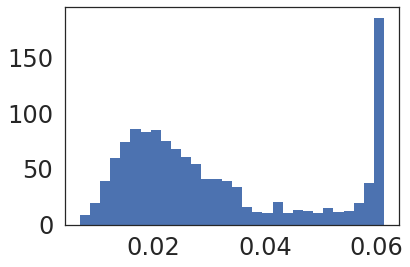

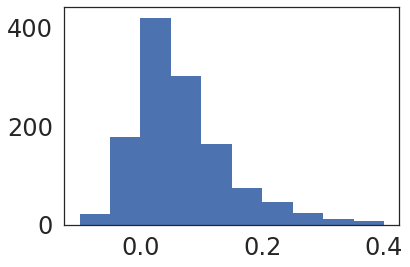

In [1320]:
#plot tresholded change over a fixed time period instead of fluct

#sns.regplot(np.array(corr_pc).flatten(),np.array(corr_selectivity_fluct).flatten(),x_bins=10)

delta_sel = []
pc_delta_ratio = []

for i in xrange(5):
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][20,:]-RF_results[net_idx]['selectivities_t_corr'][i][19,:]))

sns.regplot(np.array(corr_pc).flatten(),np.array(delta_sel).flatten(),x_bins=10)


plt.figure()
plt.hist(np.array(corr_selectivity).flatten(),30)

plt.figure()
plt.hist(np.array(corr_pc).flatten(),10)

In [1088]:
try measure_selectivity_from_frozen in run_RF_net to redo fig 3 plots

(<module 'numpy' from '/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/numpy/__init__.pyc'>,
 (250,))

In [1325]:
delta_sel = []
pc_delta_ratio = []

for i in xrange(5):
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][20,:]-RF_results[net_idx]['selectivities_t_corr'][i][19,:]))
    pc_delta_ratio.append(np.mean(np.array(corr_pc)[i][delta_sel[-1]>.015])/np.mean(np.array(corr_pc)[i][delta_sel[-1]<.015]))
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][19,:]-RF_results[net_idx]['selectivities_t_corr'][i][18,:]))
    pc_delta_ratio.append(np.mean(np.array(corr_pc)[i][delta_sel[-1]>.015])/np.mean(np.array(corr_pc)[i][delta_sel[-1]<.015]))
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][18,:]-RF_results[net_idx]['selectivities_t_corr'][i][17,:]))
    pc_delta_ratio.append(np.mean(np.array(corr_pc)[i][delta_sel[-1]>.015])/np.mean(np.array(corr_pc)[i][delta_sel[-1]<.015]))
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][17,:]-RF_results[net_idx]['selectivities_t_corr'][i][16,:]))
    pc_delta_ratio.append(np.mean(np.array(corr_pc)[i][delta_sel[-1]>.015])/np.mean(np.array(corr_pc)[i][delta_sel[-1]<.015]))
    delta_sel.append(np.abs(RF_results[net_idx]['selectivities_t_corr'][i][16,:]-RF_results[net_idx]['selectivities_t_corr'][i][15,:]))
    pc_delta_ratio.append(np.mean(np.array(corr_pc)[i][delta_sel[-1]>.015])/np.mean(np.array(corr_pc)[i][delta_sel[-1]<.015]))

    
#sns.regplot(np.array(corr_pc).flatten(),np.array(delta_sel).flatten(),x_bins=10)


IndexError: list index out of range

Text(0.5,0,u'Population coupling ratio')

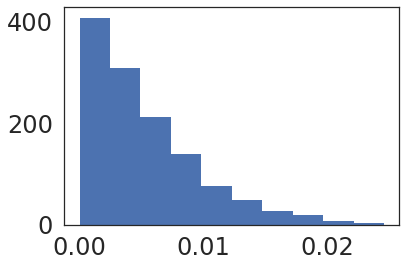

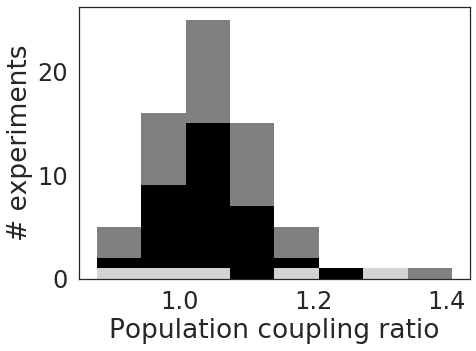

In [1326]:
plt.hist(np.array(delta_sel).flatten())

plt.figure()
#plt.hist(pc_delta_ratio,10)

f, ax = plt.subplots(figsize=(7, 5))
ax.hist([pc_delta_ratio,np.array(ttest_stats)[N_50_idcs],np.array(ttest_stats)[N_250_idcs]],color=['lightgray','black','gray'],histtype='barstacked',bins=8)
ax.set_ylabel('# experiments')
#ax.set_xlabel(r'$\Delta ORI_{pref}^ {high PC} - \Delta ORI_{pref}^{low PC}$')
ax.set_xlabel('Population coupling ratio')


In [321]:
sum(change_labels==2)

514

## testing response distribution stability 

In [853]:
#### import glob
#ABI_results = glob.glob('/home/ysweeney/CNL-brain3/data/topdown_learning/ABI_data/analysis/*preserved_pc.pkl')
import os
import pandas as pd

data_files = os.listdir('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/boc/ophys_experiment_data/')

data_sets = []
for data_file in data_files:
    data_sets.append(int(data_file.partition('.')[0]))

diff_ori_dg = []
diff_tf_dg = []
mean_popcorr_diff_ori_dg_diff = []

diff_ori_sg = []
diff_sf_sg = []
mean_popcorr_diff_ori_sg_diff = []


combined_popcorr_diff_ori = []
combined_popcorr_nodiff_ori = []

combined_popcorr_diff_tf = []
combined_popcorr_nodiff_tf = []
combined_popcorr_diff_sf = []
combined_popcorr_nodiff_sf = []

combined_popcorr_diff_vis= []
combined_popcorr_nodiff_vis = []

combined_popcorrs_mean = []
combined_popcorrs_std = []
combined_ori_change = []
combined_sf_tf_change = []
combined_rates_mean = []
combined_rates_std = []
combined_peak_sf = []
combined_ori_before = []
combined_ori_after = []

combined_osi = []
combined_dsi = []
combined_vis = []

combined_reliability_before = []
combined_reliability_after = []

combined_responses_before = []
combined_responses_after = []

combined_events_before = []
combined_events_after = []

combined_responses_dist_change_pval = []
combined_responses_dist_change_orig = []
combined_responses_dist_change_late = []
combined_responses_dist_change_other = []

data_sets[10]

ttest_stats = []
ttest_stats_rates = []
ttest_pval = []
# 503109347 a clear example for cumulative hist difference

counter = 0
N_250_idcs = [] 
N_50_idcs = []

Ncells_exp = []

PC_thresh = 0.3

include_dg = True
include_sg = False

potential_datasets = []
using_datasets = []

for data_set in data_sets:
    try:
        res = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_preserved_pc.pkl')    
        popcorr_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_pc_bins.pkl')  
        rates_bins_results = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_rates_bins.pkl')    
        print 'loading'
        potential_datasets.append(str(data_set))
    except:
        print 'no analysis for dataset ', data_set
        continue
        
    if res.has_key('ori_dg') and len(res['ori_dg'][0])>50 and include_dg:
        using_datasets.append(str(data_set))
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        reliability_before_25pc = np.percentile(res['response_reliability_dg'][0],50) 
        #reliability_before_25pc = 0
        
        Ncells_exp.append(len(res['ori_dg'][0]))
        #if res.has_key('ori_dg') and len(res['ori_dg'][0])>250:
        N_250_idcs.append(counter)
        #else:
        #N_50_idcs.append(counter)
            
        counter +=1 

        #diff_ori_dg = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])>0
        #nodiff_ori_dg = np.abs(res['ori_dg'][0][res['response_reliability_dg'][0]>reliability_before_25pc] - res['ori_dg'][1][res['response_reliability_dg'][0]>reliability_before_25pc])<1
        diff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(res['ori_dg'][0] - res['ori_dg'][1])<1
       
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        
        combined_popcorr_nodiff_ori = np.mean(popcorr_bins_results,axis=1)[((nodiff_ori_dg>0) & (res['response_reliability_dg'][0]>reliability_before_25pc))]
        combined_popcorr_diff_ori = np.mean(popcorr_bins_results,axis=1)[((diff_ori_dg>0) & (res['response_reliability_dg'][0]>reliability_before_25pc))]
        

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(45.0*np.abs(res['ori_dg'][0] - res['ori_dg'][1]))
        combined_ori_before.extend(res['ori_dg'][0])
        combined_ori_after.extend(res['ori_dg'][1])
        combined_sf_tf_change.extend(np.abs(res['tf_dg'][0] - res['tf_dg'][1]))
        combined_peak_sf.extend((res['peak_dff_dg'][0] + res['peak_dff_dg'][1]))

        #combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_tf_dg>0)]))
        #combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(res['osi_dg'][0]))
        combined_dsi.extend(list(res['dsi_dg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_dg'][0])
        combined_reliability_after.extend(res['response_reliability_dg'][1])

        combined_responses_before.extend(res['responses_dg'][0])
        combined_responses_after.extend(res['responses_dg'][1]) 
        
        
        print 'response dg shape', res['responses_dg'][0].shape, (res['responses_dg'][0].shape[2]-1)
        responses_dg_sample = res['responses_dg'][0].copy()
        for idx in xrange(res['responses_dg'][0].shape[2]-1):
            temp = []
            temp_late = []
            temp_other = []
            for jdx in xrange(4):
                temp.append(np.abs(res['responses_dg'][0][res['ori_dg'][0][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][0][idx],jdx,idx,0])/np.divide(res['responses_dg'][0][res['ori_dg'][0][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][0][idx],jdx,idx,1],2))
                #temp.append(np.abs(res['responses_dg'][0][res['ori_dg'][0][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][0][idx],jdx,idx,0])/np.sqrt(res['responses_dg'][0][res['ori_dg'][0][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][0][idx],jdx,idx,1]))
                if not res['ori_dg'][1][idx] == res['ori_dg'][0][idx]:
                    temp_late.append(np.abs(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,0])/np.divide(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,1],2))
                random_ori = np.random.choice([x for x in range(8) if x not in [res['ori_dg'][0][idx],res['ori_dg'][1][idx]]])
                temp_other.append(np.abs(res['responses_dg'][0][random_ori,jdx,idx,0]-res['responses_dg'][1][random_ori,jdx,idx,0])/np.divide(res['responses_dg'][0][random_ori,jdx,idx,1]+res['responses_dg'][1][random_ori,jdx,idx,1],2))
                #temp.append(np.abs(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,0])/np.sqrt(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,1]))
                #temp.append(np.abs(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,0]))#/np.sqrt(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,1]))
                #temp.append(np.abs(res['responses_dg'][0][0,jdx,idx,0]-res['responses_dg'][1][0,jdx,idx,0]))#/np.sqrt(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,1]))
                #temp.append(np.abs(res['responses_dg'][0][res['ori_dg'],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'],jdx,idx,0])/1)
                #temp.append(stats.ks_2samp(res['responses_dg'][0][res['ori_dg'][jdx][idx],0],res['responses_dg'][1][res['ori_dg'][jdx][idx],0,:,0])[0])
                #temp.append(np.abs(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,0]-res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,0])/np.sqrt(res['responses_dg'][0][res['ori_dg'][1][idx],jdx,idx,1]+res['responses_dg'][1][res['ori_dg'][1][idx],jdx,idx,1]))
            combined_responses_dist_change_orig.append(np.mean(temp))
            combined_responses_dist_change_late.append(np.mean(temp_late))
            combined_responses_dist_change_other.append(np.mean(temp_other))

        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
    
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc][np.where(diff_ori_dg>0)]))/np.mean(list(np.mean(popcorr_bins_results,axis=1)[res['response_reliability_dg'][0]>reliability_before_25pc][np.where(nodiff_ori_dg>0)])))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_dg'][0] - res['ori_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['tf_dg'][0] - res['tf_dg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        #ttest_stats_rates.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_tf))
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)[1])
        #ttest_pval_rates.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_dg'][0] - res['ori_dg'][1]))

        
    if res.has_key('ori_sg') and len(res['ori_sg'][0])>50 and include_sg:
        using_datasets.append(str(data_set))
        print 'sg'
        res_events_early = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_early_events.pkl')    
        res_events_late = pd.read_pickle('/mnt/DATA/ysweeney/data/topdown_learning/ABI_data/analysis/'+str(data_set)+'_late_events.pkl')    

        Ncells_exp.append(len(res['ori_sg'][0]))
        #if res.has_key('ori_sg') and len(res['ori_sg'][0])>250:
        #N_250_idcs.append(counter)
        #else:
        N_50_idcs.append(counter)
        counter +=1 
        
        reliability_before_25pc = np.percentile(res['response_reliability_sg'][0],50) 
        #reliability_before_25pc = 0

        diff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])>0
        nodiff_ori_sg = np.abs(res['ori_sg'][0] - res['ori_sg'][1])<1
        
        diff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])>0
        nodiff_sf_sg = np.abs(res['sf_sg'][0] - res['sf_sg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results,axis=1))
        
        
        combined_popcorr_nodiff_ori = np.mean(popcorr_bins_results,axis=1)[((nodiff_ori_sg>0) & (res['response_reliability_sg'][0]>reliability_before_25pc))]
        combined_popcorr_diff_ori = np.mean(popcorr_bins_results,axis=1)[((diff_ori_sg>0) & (res['response_reliability_sg'][0]>reliability_before_25pc))]
  
        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results,axis=1)))
        #combined_popcorrs_mean.extend(list(scipy.stats.zscore(np.mean(popcorr_bins_results,axis=1))))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results,axis=1)))
        combined_rates_mean.extend(list(np.mean(rates_bins_results,axis=1)))
        combined_rates_std.extend(list(np.std(rates_bins_results,axis=1)))
        combined_ori_change.extend(30.0*np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        combined_ori_before.extend(res['ori_sg'][0])
        combined_ori_after.extend(res['ori_sg'][1])
        combined_sf_tf_change.extend(np.abs(res['sf_sg'][0] - res['sf_sg'][1]))
        combined_peak_sf.extend((res['peak_dff_sg'][0] + res['peak_dff_sg'][1]))

        combined_popcorr_diff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(diff_sf_sg>0)]))
        combined_popcorr_nodiff_sf.extend(list(np.mean(popcorr_bins_results,axis=1)[np.where(nodiff_sf_sg>0)]))
        
        combined_osi.extend(list(res['osi_sg'][0]))
        combined_vis.extend(list(res['vis'][0]))
        
        combined_reliability_before.extend(res['response_reliability_sg'][0])
        combined_reliability_after.extend(res['response_reliability_sg'][1])
        
        combined_responses_before.extend(res['responses_sg'][0])
        combined_responses_after.extend(res['responses_sg'][1])

        combined_events_before.extend(res_events_early.sum(axis=1))
        combined_events_after.extend(res_events_late.sum(axis=1))
        
        #ttest_stats.append(np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['ori_sg'][0] - res['ori_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))
        #ttest_stats.append(np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)>np.percentile(popcorr_bins_results,75)])-np.mean(np.abs(res['sf_sg'][0] - res['sf_sg'][1])[np.mean(popcorr_bins_results,axis=1)<np.percentile(popcorr_bins_results,75)]))

        #ttest_stats.append(np.mean(combined_popcorr_diff_sf)/np.mean(combined_popcorr_nodiff_sf))
        ttest_stats.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[0])
        #ttest_stats.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[0])
        #ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_sf,combined_popcorr_nodiff_sf)[1])
        ttest_pval.append(scipy.stats.ttest_ind(combined_popcorr_diff_ori,combined_popcorr_nodiff_ori)[1])
        
        ttest_stats_rates.append(np.mean(combined_popcorr_diff_ori)/np.mean(combined_popcorr_nodiff_ori))

        print scipy.stats.pearsonr(list(np.mean(popcorr_bins_results,axis=1)),np.abs(res['ori_sg'][0] - res['ori_sg'][1]))
        

loading
loading
no analysis for dataset  530645663
no analysis for dataset  512326618
loading
response dg shape (38, 35, 271, 3) 270
(-0.089206062813630554, 0.14376296373380434)
no analysis for dataset  501704220
no analysis for dataset  501836392
loading
response dg shape (38, 35, 233, 3) 232
(-0.044488457093512852, 0.50011942791495168)
loading
no analysis for dataset  501886692
loading
response dg shape (38, 35, 354, 3) 353
(0.13791537567824627, 0.0094752591029664598)
loading
loading
response dg shape (38, 35, 188, 3) 187
(0.086354098036044866, 0.23993345344702516)
loading
response dg shape (38, 35, 221, 3) 220
(-0.027209526398864488, 0.68815676961977246)
loading
no analysis for dataset  526928092
no analysis for dataset  530773844
no analysis for dataset  509962140
no analysis for dataset  529693740
loading
no analysis for dataset  512311673
no analysis for dataset  510221121
loading
loading
response dg shape (37, 34, 298, 3) 297
(0.092365743692950336, 0.1121761838841107)
loading
no

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in double_scalars


(0.13279280315912287, 0.057070166558694665)
loading
no analysis for dataset  504115289
loading
response dg shape (38, 35, 320, 3) 319
(0.046772908758630591, 0.40508884629584418)
no analysis for dataset  500947031
loading
response dg shape (38, 35, 145, 3) 144
(0.0176680951223246, 0.83352271896576324)
no analysis for dataset  530318805
loading
no analysis for dataset  532233176
no analysis for dataset  535423614
loading
loading
response dg shape (38, 35, 212, 3) 211
(0.084148981530696818, 0.22351536257577612)
loading
loading
response dg shape (38, 35, 360, 3) 359
(0.046191689897736407, 0.38286958923403791)
loading
no analysis for dataset  506809539
no analysis for dataset  504637623
loading
response dg shape (38, 35, 230, 3) 229
(0.091949828315963822, 0.16550930566702929)
no analysis for dataset  510698988
no analysis for dataset  531124922
loading
no analysis for dataset  501271265
loading
loading
no analysis for dataset  539820172
loading
response dg shape (37, 34, 273, 3) 272
(0.0035

([array([ 193.,   64.,    2.,    5.,    0.,    1.,    2.,    0.,    0.,    0.]),
  array([ 210.,   44.,    8.,    1.,    1.,    0.,    1.,    0.,    1.,    1.])],
 array([  1.11093972e-02,   1.47743091e+00,   2.94375243e+00,
          4.41007394e+00,   5.87639546e+00,   7.34271697e+00,
          8.80903849e+00,   1.02753600e+01,   1.17416815e+01,
          1.32080030e+01,   1.46743245e+01]),
 <a list of 2 Lists of Patches objects>)

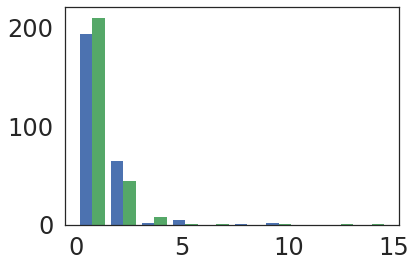

In [408]:
plt.hist([combined_responses_before[128][0,0,:,1],combined_responses_after[128][0,0,:,1]])

In [668]:
stats.ks_2samp(combined_responses_before[132][0,1,:,0],combined_responses_after[132][0,1,:,0])[1]

IndexError: too many indices for array

In [667]:
stats.ks_2samp(res['responses_sg'][0][res['ori_sg'][0],0,0,:,0],res['responses_sg'][1][res['ori_sg'][0],0,0,:,0])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [627]:
res['responses_sg'][0].shape

(6, 5, 4, 114, 3)

In [666]:
combined_responses_dist_change_pval = stats.ks_2samp(res['responses_sg'][0][res['ori_sg'][0],0,:,0],res['responses_sg'][1][res['ori_sg'][0],0,:,0])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [478]:
res['responses_sg'][0][res['ori_sg'][0][70],0,0,:,0].shape

(114,)

In [495]:
combined_responses_dist_change_pval.append(stats.ks_2samp(res['responses_dg'][0][res['ori_dg'][0][0],0,:,0],res['responses_dg'][1][res['ori_dg'][0][0],0,:,0])[0])

In [501]:
xrange(res['responses_dg'][0].shape[2])

xrange(271)

In [529]:
stats.spearmanr(np.array(combined_responses_dist_change_pval)>0.01,np.array(combined_ori_change))

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SpearmanrResult(correlation=nan, pvalue=nan)

SpearmanrResult(correlation=nan, pvalue=nan)


/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


ValueError: all the input array dimensions except for the concatenation axis must match exactly

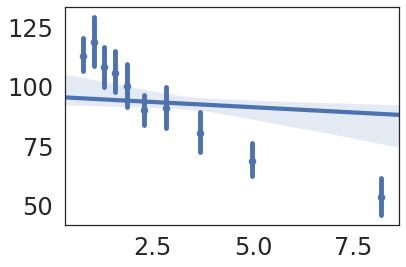

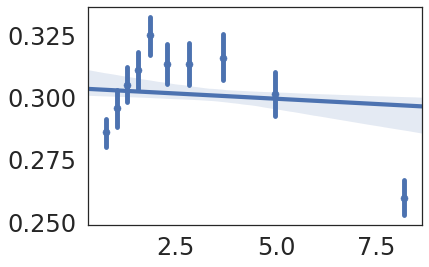

In [775]:
combined_ori_change_arr = np.array(combined_ori_change)
combined_responses_dist_change_pval_arr = np.array(combined_responses_dist_change_pval)
combined_responses_dist_change_orig_arr = np.array(combined_responses_dist_change_orig)
combined_responses_dist_change_late_arr = np.array(combined_responses_dist_change_late)

sns.regplot(np.array(combined_responses_dist_change_orig_arr),combined_ori_change_arr,x_bins=10)
print stats.spearmanr(np.array(combined_responses_dist_change_orig_arr),combined_ori_change_arr)


plt.figure()
sns.regplot(np.array(combined_responses_dist_change_orig_arr),np.array(combined_popcorrs_mean),x_bins=10)
print stats.spearmanr(combined_responses_dist_change_orig_arr[combined_responses_dist_change_orig_arr>0],np.array(combined_popcorrs_mean)[combined_responses_dist_change_pval_arr>0])

In [555]:
np.array(combined_responses_dist_change_pval)>0.01

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

(array([ 2313.,   699.,   418.,     0.,   366.,   672.,     0.,   236.,
          203.,   110.]),
 array([   0. ,   31.5,   63. ,   94.5,  126. ,  157.5,  189. ,  220.5,
         252. ,  283.5,  315. ]),
 <a list of 10 Patch objects>)

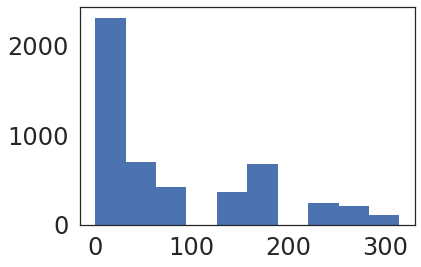

In [586]:
plt.hist(combined_ori_change_reliable_25pc)

In [590]:
print scipy.stats.spearmanr(np.array(combined_responses_dist_change_pval),np.array(combined_ori_change))


SpearmanrResult(correlation=0.10033136217200364, pvalue=6.11119044840905e-19)


(array([ 2958.,  1256.,   790.,     0.,   667.,  1085.,     0.,   481.,
          382.,   195.]),
 array([   0. ,   31.5,   63. ,   94.5,  126. ,  157.5,  189. ,  220.5,
         252. ,  283.5,  315. ]),
 <a list of 10 Patch objects>)

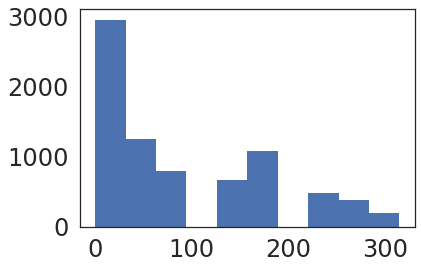

In [588]:
plt.hist(np.array(combined_ori_change)[np.array(combined_ori_change)<1000])

ValueError: max must be larger than min in range parameter.

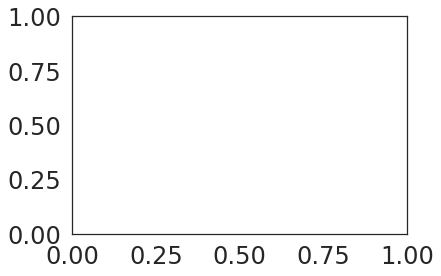

In [692]:
plt.hist(np.array(combined_responses_dist_change_pval).flatten())

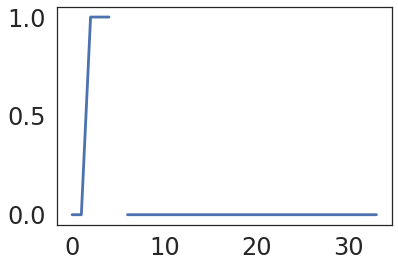

In [664]:
plt.plot(responses_dg_sample[0,:,2,2])

In [665]:
responses_dg_sample[7,4,0,0]

6.1914249128765526

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


1.53512460846
Ks_2sampResult(statistic=0.034554458615780131, pvalue=0.0018115251350754509)
Ks_2sampResult(statistic=0.1393184719639457, pvalue=7.7779124431713876e-50)
Ks_2sampResult(statistic=0.11107924921793533, pvalue=9.2573666174877063e-42)


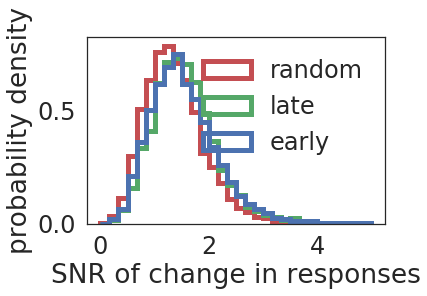

In [859]:
plt.hist([np.array(combined_responses_dist_change_orig)[np.array(combined_responses_dist_change_orig)>0],np.array(combined_responses_dist_change_late)[np.array(combined_responses_dist_change_late)>0],np.array(combined_responses_dist_change_other)[np.array(combined_responses_dist_change_other)>0]],histtype='step',range=(0,5),bins=30,lw=5,normed=True,label=['early','late','random'])
plt.legend()
plt.ylabel('probability density')
plt.xlabel('SNR of change in responses')

print np.mean(np.array(combined_responses_dist_change_orig)[np.array(combined_responses_dist_change_orig)>0])
print stats.ks_2samp(np.array(combined_responses_dist_change_orig)[np.array(combined_responses_dist_change_orig)>0],np.array(combined_responses_dist_change_late)[np.array(combined_responses_dist_change_late)>0])
print stats.ks_2samp(np.array(combined_responses_dist_change_other)[np.array(combined_responses_dist_change_other)>0],np.array(combined_responses_dist_change_late)[np.array(combined_responses_dist_change_late)>0])
print stats.ks_2samp(np.array(combined_responses_dist_change_other)[np.array(combined_responses_dist_change_other)>0],np.array(combined_responses_dist_change_orig)[np.array(combined_responses_dist_change_orig)>0])

plt.tight_layout()
plt.savefig('mean_SNR_change_response_distributions.png')

/mnt/DATA/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([ 2429.,  3121.,  1266.,   370.,   150.,    75.,    47.,    39.,
           31.,    27.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

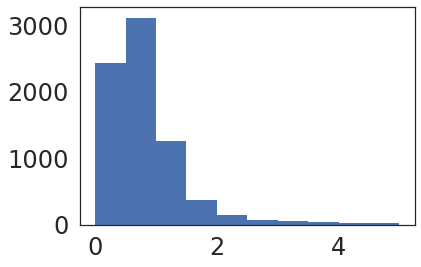

In [758]:
plt.hist(np.array(combined_dsi)[np.array(combined_dsi)>0],range=(0,5))

In [852]:
np.divide(2.0,3)

0.66666666666666663

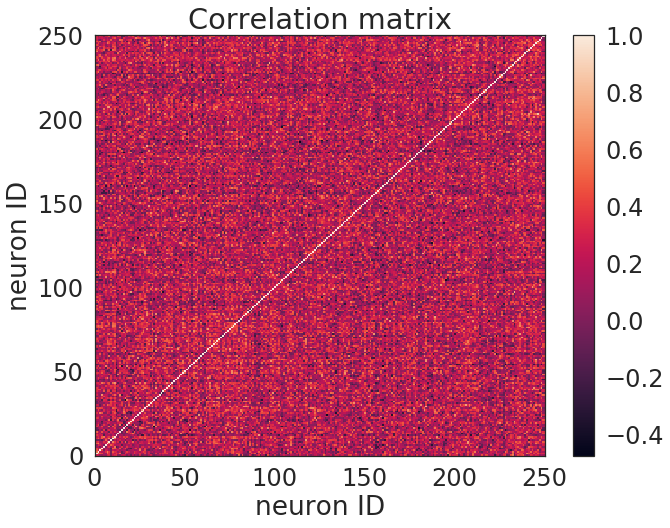

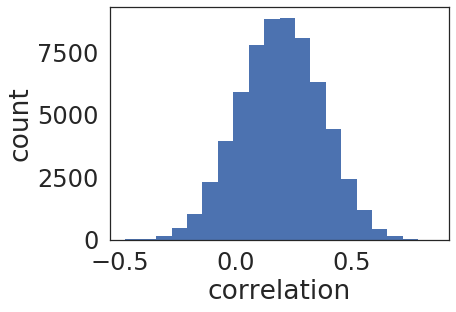

In [902]:
plt.figure(figsize=(10,8))
plt.pcolor(np.corrcoef(np.transpose(RF_results[0]['simresults_corr'][0]['x_t'])))
plt.colorbar()
plt.title('Correlation matrix')
plt.xlabel('neuron ID')
plt.ylabel('neuron ID')
plt.tight_layout()
plt.savefig('correlation_matrix_simululations.png')


corr_matrix = np.corrcoef(np.transpose(RF_results[0]['simresults_corr'][0]['x_t']))
plt.figure(figsize=(7,5))
plt.hist(corr_matrix.flatten()[corr_matrix.flatten()<0.999],20)
plt.xlabel('correlation')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('correlation_histogram.png')

In [903]:
sns.regplot?